In [5]:
# Tested with kernel "LCLS-II py3" as it includes cv2

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline 
%config InlineBackend.figure_format ='retina'

In [2]:
import os
os.getcwd()

'/cds/home/b/bwt/MeV-UED'

In [78]:
from ued_data_analysis import file_to_h5, parse_h5, ord_dict, UED_Exp, find_center, quads_class

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import cm
from matplotlib.patches import Arrow, Circle
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from scipy import optimize
import h5py

In [5]:
#fileloader = file_to_h5(path_data= os.getcwd() +'/scan001', folder_key="images-ANDOR1")

#remote_path = '/cds/group/ued/data/ueduu4602/CHBr3/20201117/Run/20201117_1825'
#remote_path = '/cds/group/ued/data/ueduu4602/CHBr3/20201117/Run/20201117_2133'
remote_path = '/cds/group/ued/data/ueduu4602/CHBr3/20201118/Run/20201118_1554' # Extremely noisy?
#remote_path = '/cds/group/ued/data/ueduu4602/CHBr3/20201118/Run/20201118_2322' # > 24 hours! 18th 23:22:29 to 20th 09:01:07
#remote_path = '/cds/group/ued/data/ueduu4602/CHBr3/20201120/Run/20201120_1532'

#fn = os.getcwd().split("/")[-1]
fn = remote_path.split("/")[-1]
print(f"Output files will be named with prefix: {fn}")

Output files will be named with prefix: 20201118_1554


In [6]:
# Run once per dataset to make h5. Can only use file_to_h5 if we we have the raw files are readable!
save = False

fileloader = file_to_h5(path_data=remote_path, folder_key="images-ANDOR1")

if save:
    fileloader.load_and_save_h5(activate_save=True, name_h5=fn)
    
#fileloader.res

folder: images-ANDOR1
path: /cds/group/ued/data/ueduu4602/CHBr3/20201118/Run/20201118_1554/scan001/
found 2375 files


In [8]:
info_h5 = parse_h5.get_info_h5(os.getcwd() + "/" + fn + '.h5')

images-ANDOR1: <HDF5 group "/images-ANDOR1" (2375 members)>
Shape of example img (1024, 1024)
Number of delays: 2375
['005_161.12321000', '051_161.12321000', '064_161.12321000', '1032_161.12321000', '1068_161.12321000', '1112_161.12321000', '1127_161.12321000', '112_161.12321000', '1174_161.12321000', '1187_161.12321000', '1216_161.12321000', '1250_161.12321000', '1301_161.12321000', '1309_161.12321000', '1364_161.12321000', '1383_161.12321000', '1420_161.12321000', '1455_161.12321000', '1486_161.12321000', '1505_161.12321000', '1541_161.12321000', '154_161.12321000', '1581_161.12321000', '1587_161.12321000', '1617_161.12321000', '1661_161.12321000', '1687_161.12321000', '1730_161.12321000', '1740_161.12321000', '1786_161.12321000', '1824_161.12321000', '1832_161.12321000', '185_161.12321000', '1866_161.12321000', '1908_161.12321000', '1933_161.12321000', '1959_161.12321000', '198_161.12321000', '1996_161.12321000', '2041_161.12321000', '2052_161.12321000', '2095_161.12321000', '2118_1

In [9]:
info_h5['delays_i']()[0:5]

[('005_161.12321000', 161.12321, 0),
 ('051_161.12321000', 161.12321, 1),
 ('064_161.12321000', 161.12321, 2),
 ('1032_161.12321000', 161.12321, 3),
 ('1068_161.12321000', 161.12321, 4)]

In [10]:
info_h5.keys()

dict_keys(['delays_i', 'num_delays', 'CCD_height', 'CCD_length', 'folder_key', 'file_path_h5'])

In [11]:
# Delay position and number of measurements at that position
from collections import Counter
a = dict(Counter(info_h5['delays_i'].values()))
a

{161.12321: 76,
 161.1981575: 77,
 161.273105: 76,
 161.2880945: 77,
 161.303084: 77,
 161.31057875: 76,
 161.3180735: 76,
 161.32556825: 77,
 161.333063: 77,
 161.34055775: 76,
 161.3480525: 77,
 161.35554725: 76,
 161.363042: 77,
 161.37053675: 77,
 161.3780315: 76,
 161.38552625: 77,
 161.393021: 77,
 161.40051575: 77,
 161.4080105: 76,
 161.41550525: 76,
 161.423: 77,
 161.43049475: 77,
 161.4379895: 76,
 161.44548425: 76,
 161.452979: 77,
 161.46047375: 77,
 161.4679685: 77,
 161.482958: 76,
 161.512937: 77,
 161.542916: 77,
 161.572895: 77}

CCD dims: 1024 1024
ROI will be used: (130, 400)
Starting smoothing of images. Using blur to find outlier pixels. Only outliers by sigma=2.0 are replaced with blur.  Better than blurring whole image!
0 005_161.12321000 161.12321
100 1585_161.19815750 161.1981575
200 2255_161.27310500 161.273105
300 844_161.28809450 161.2880945
400 1374_161.31057875 161.31057875
500 2072_161.31807350 161.3180735
600 645_161.32556825 161.32556825
700 1240_161.34055775 161.34055775
800 1923_161.34805250 161.3480525
900 435_161.35554725 161.35554725
1000 1050_161.37053675 161.37053675
1100 1718_161.37803150 161.3780315
1200 242_161.38552625 161.38552625
1300 946_161.39302100 161.393021
1400 152_161.40801050 161.4080105
1500 2200_161.41550525 161.41550525
1600 762_161.42300000 161.423
1700 1358_161.43798950 161.4379895
1800 2032_161.44548425 161.44548425
1900 571_161.45297900 161.452979
2000 1202_161.46796850 161.4679685
2100 186_161.48295800 161.482958
2200 370_161.51293700 161.512937
2300 084_161.57289500

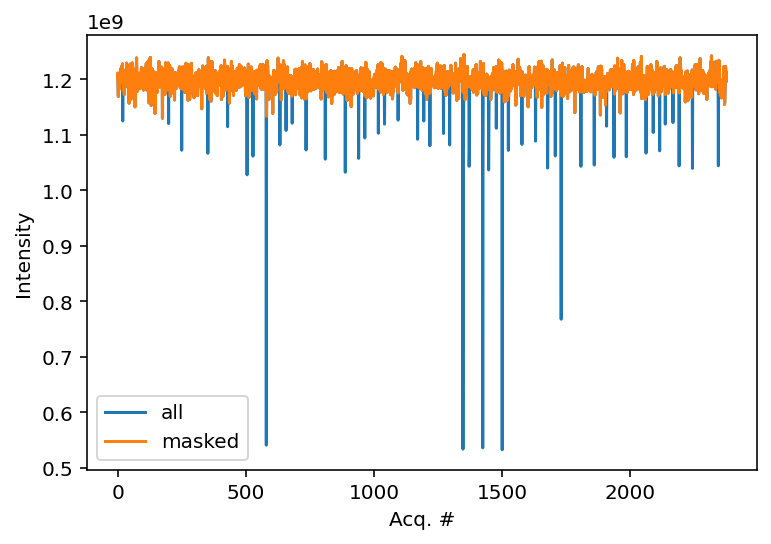

FUNCTION approx_center() called
Using 100 to estimate center position. Minimize difference between quadrants in ROI (130, 400): 
Delay_key: 005_161.12321000 	 Delay_idx: 0 	  guess: [501 548], rms: 50.55, 	 fit center: 498.56,  544.04, rms: 24.51


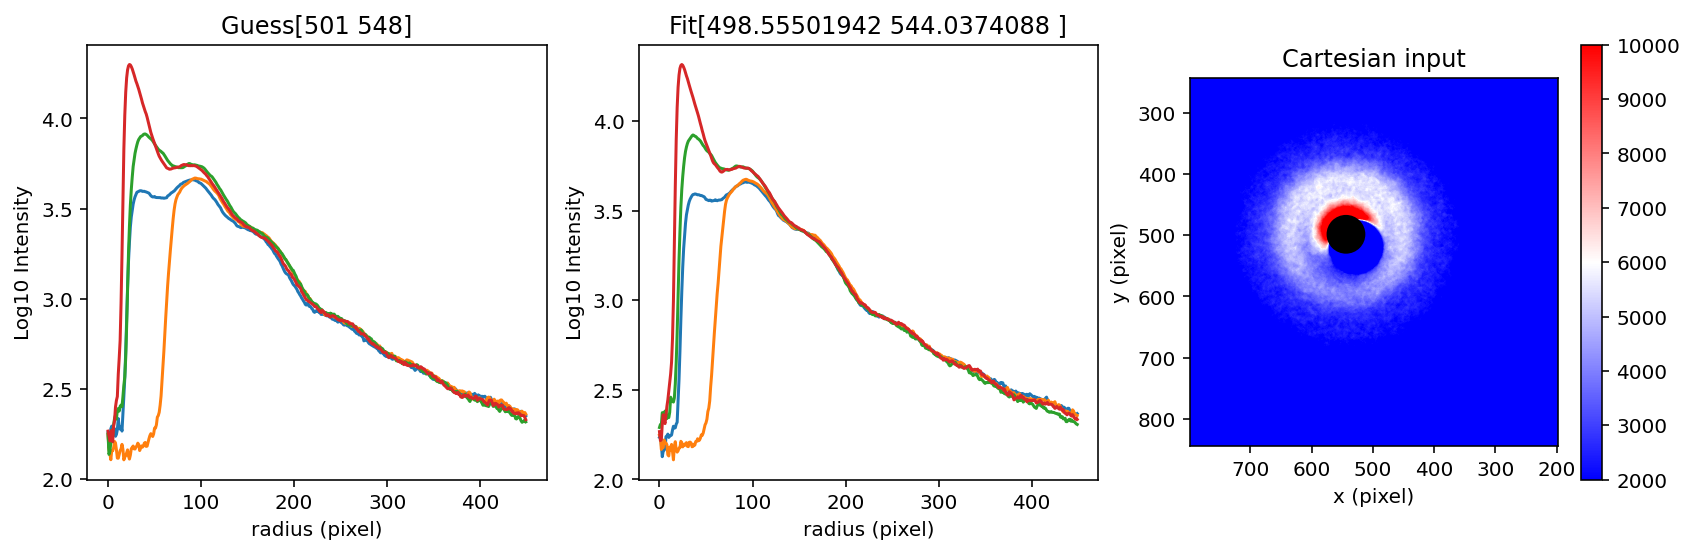

Delay_key: 051_161.12321000 	 Delay_idx: 1 	  guess: [501 548], rms: 50.74, 	 fit center: 498.96,  543.87, rms: 26.36


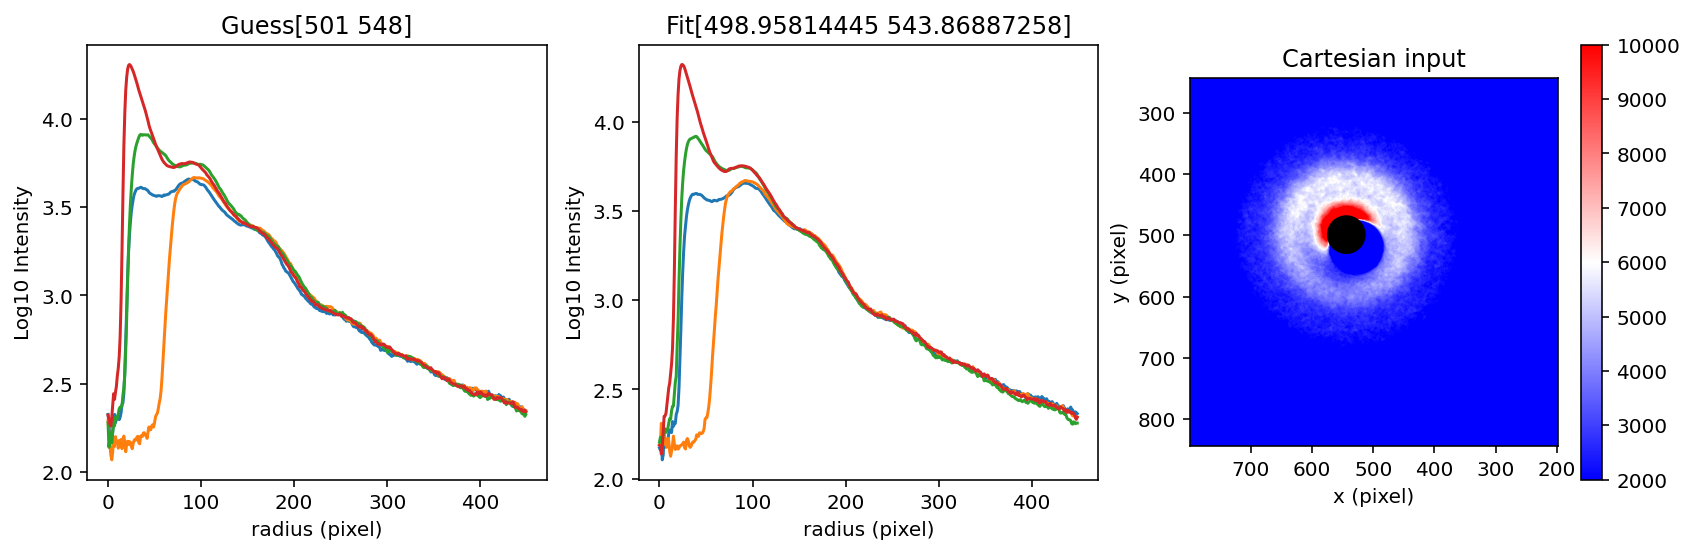

Delay_key: 064_161.12321000 	 Delay_idx: 2 	  guess: [501 548], rms: 48.38, 	 fit center: 498.45,  544.26, rms: 27.25


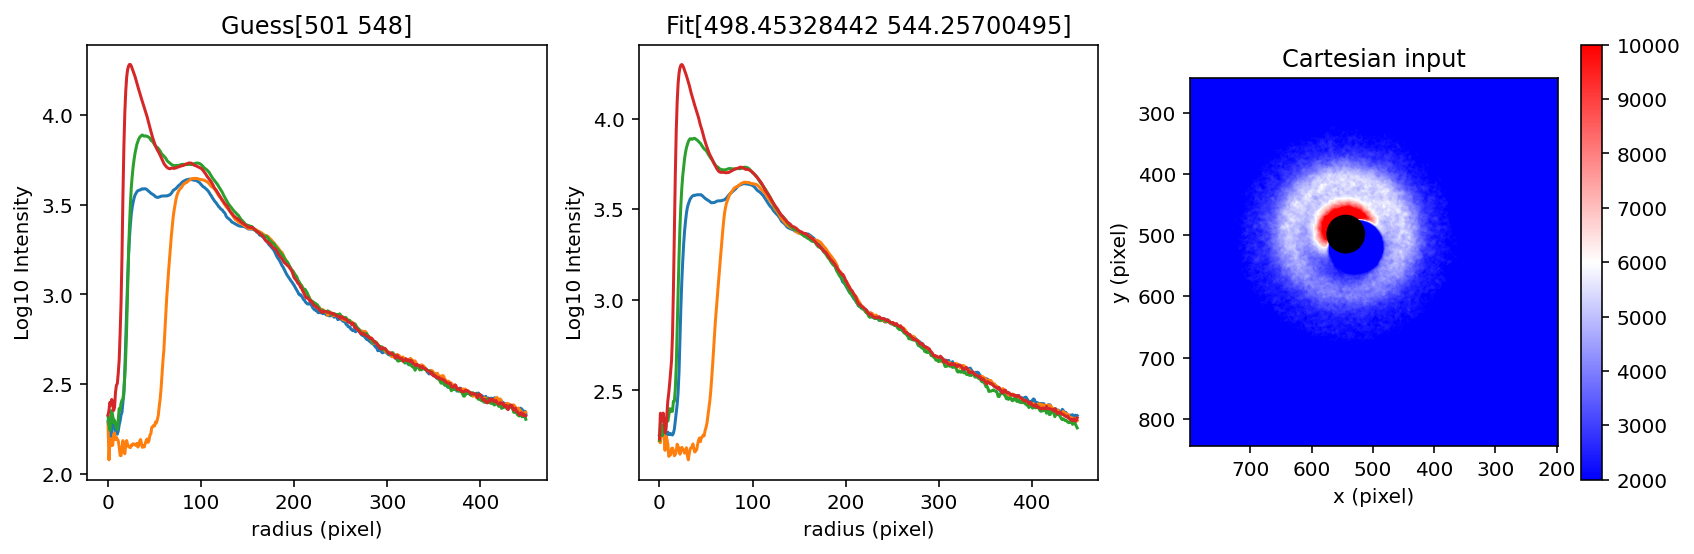

Delay_key: 1032_161.12321000 	 Delay_idx: 3 	  guess: [501 548], rms: 53.06, 	 fit center: 498.08,  543.84, rms: 26.64


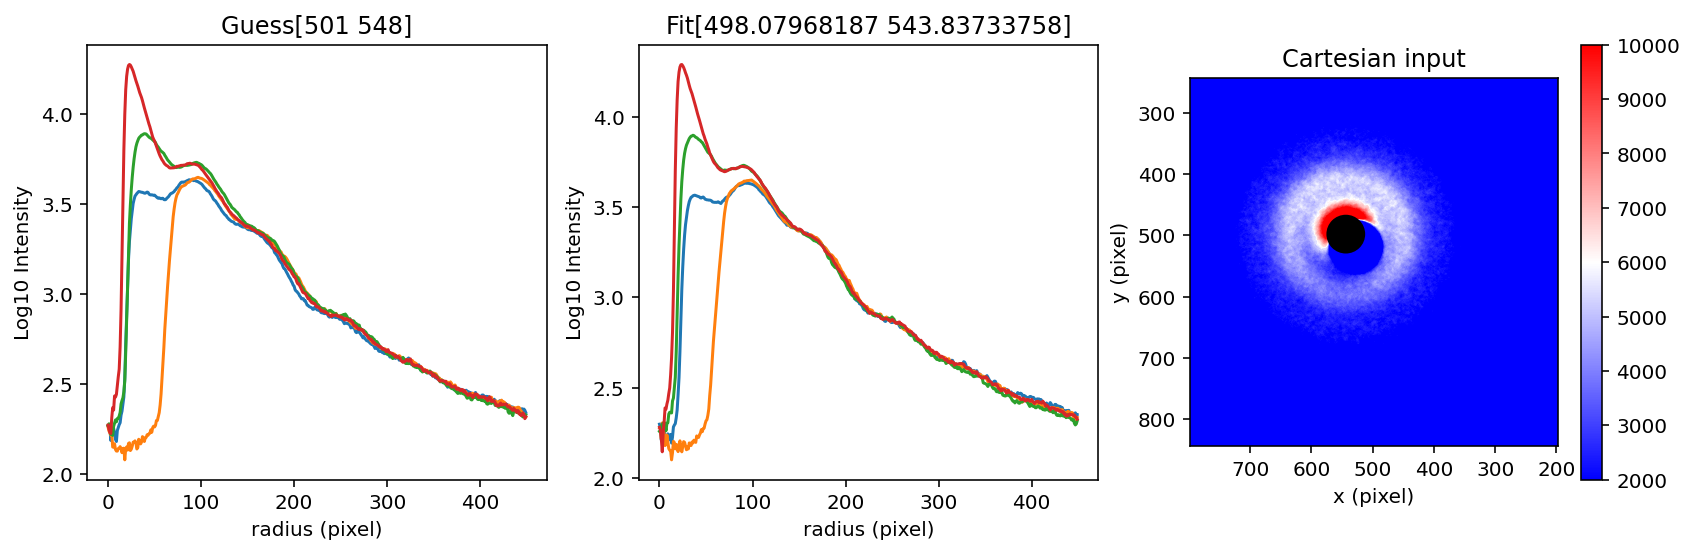

Delay_key: 1068_161.12321000 	 Delay_idx: 4 	  guess: [501 548], rms: 51.59, 	 fit center: 498.16,  543.94, rms: 24.42
Delay_key: 1112_161.12321000 	 Delay_idx: 5 	  guess: [501 548], rms: 47.21, 	 fit center: 498.93,  543.85, rms: 22.71
Delay_key: 1127_161.12321000 	 Delay_idx: 6 	  guess: [501 548], rms: 47.84, 	 fit center: 498.38,  544.32, rms: 24.59
Delay_key: 112_161.12321000 	 Delay_idx: 7 	  guess: [501 548], rms: 49.86, 	 fit center: 498.33,  544.55, rms: 27.33
Delay_key: 1174_161.12321000 	 Delay_idx: 8 	  guess: [501 548], rms: 50.28, 	 fit center: 498.70,  543.96, rms: 25.69
Delay_key: 1187_161.12321000 	 Delay_idx: 9 	  guess: [501 548], rms: 49.50, 	 fit center: 498.51,  544.19, rms: 28.79
Delay_key: 1216_161.12321000 	 Delay_idx: 10 	  guess: [501 548], rms: 53.53, 	 fit center: 498.45,  543.59, rms: 25.24
Delay_key: 1250_161.12321000 	 Delay_idx: 11 	  guess: [501 548], rms: 53.77, 	 fit center: 498.03,  543.91, rms: 27.15
Delay_key: 1301_161.12321000 	 Delay_idx: 12 	 

In [16]:
# Load the experiment from info
Exp = UED_Exp(info_h5)

In [37]:
# This is what you have to work with!
[f for f in dir(Exp) if not f.startswith('__')]

['CCD_height',
 'CCD_length',
 'approx_center',
 'center',
 'delays_cnt',
 'delays_dict',
 'delays_i',
 'delays_mask',
 'delays_unique',
 'drop',
 'duplicates',
 'file_path_h5',
 'find_hot_pixels',
 'folder_key',
 'imgN',
 'imgN_mean',
 'img_integral',
 'img_m',
 'img_mean',
 'load_h5',
 'mask_outliers',
 'maxRadius',
 'mean_image_each_delay',
 'meanquads',
 'meanquadsN',
 'normRegion',
 'num_delays',
 'quadOutliers',
 'quadrants',
 'quadrants_stats',
 'quads',
 'quadsN',
 'quadsNClean',
 'quadsNfilt',
 'reject_outliers',
 'removeOutliers',
 'roi',
 'sigma_outliers',
 'stdquads',
 'stdquadsN',
 'useQuadrants']

FUNCTION find_hot_pixels() called
Threshold: +/- 152, Hot pixels that will be replaced with blur: 66313


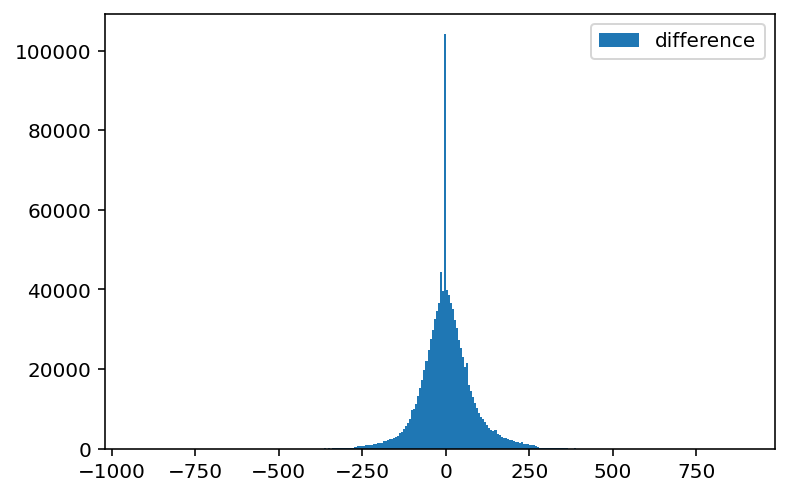

array([[513., 426., 506., ..., 550., 561., 540.],
       [529., 481., 486., ..., 492., 520., 484.],
       [529., 519., 461., ..., 495., 568., 580.],
       ...,
       [497., 501., 566., ..., 544., 517., 520.],
       [495., 442., 548., ..., 496., 515., 518.],
       [514., 557., 517., ..., 547., 537., 544.]], dtype=float32)

In [17]:
# Use blurring to find the hot pixels based on sigma, then replace only hot pixels with blur. Better than blurring whole image!
# Function looks at an image e.g. 56th image, verbose plots the pixel histogram
Exp.find_hot_pixels(Exp.img_m[56], verbose=True)

In [18]:
# Quick plot of data. Only filter here is to use self.delays_mask to discard images with
# an intensity that is outside the mean by property self.sigma_outliers ~2.

sub = [-5,-1]
data = np.mean(Exp.meanquadsN[:,:,:],axis=2)-np.mean(Exp.meanquadsN[sub[0]:sub[1],:,:],axis=(0,2))

def plot_panel_t_minus_negt(data, vscale=0.02, delays = [1, 5, len(Exp.delays_unique)-1], qs = [1.5, 1.3, 2.2, 2.7], saveName=f"{fn}_t_minus_t<0_guessCenter_auto.pdf", save=False) :
    fig, (ax1, ax3, ax4) = plt.subplots(ncols=1, nrows = 3, figsize=(10,10))

    #c = 299792458
    #t0 = 1000
    #taxis = t0 + (Exp.delays_unique-max(Exp.delays_unique))*2*c/1E5
    qaxis = np.linspace(0,Exp.maxRadius*0.02355,Exp.maxRadius)

    cmap = 'bwr'  #cmap = cm.PuBu_r
    #cartim1 = ax1.pcolormesh(qaxis,taxis,pd, shading='auto', cmap=cmap, vmin=-4, vmax=4)
    cartim1 = ax1.pcolormesh(qaxis,Exp.delays_unique,data, shading='auto', cmap=cmap, vmin=-vscale, vmax=vscale)
    ax1.xaxis.set_minor_locator(AutoMinorLocator(10))
    ax1.set_xlim(0,10)
    ax1.set_xlabel('Q / $\AA^{-1}$', fontsize='large'), ax1.set_ylabel('delay / position', fontsize='large')
    cbar = plt.colorbar(cartim1, ax=ax1)
    cbar.set_label("Difference, t - t<0", fontsize='large')

    speclabels = [f'{Exp.delays_unique[step]}' for step in delays]
    print(f"delaysteps: {delays}, labels: {speclabels}")
    spectr = np.transpose([data[d] for d in delays])
    ax3.plot(qaxis, spectr)
    ax3.xaxis.set_major_locator(MultipleLocator(1))
    ax3.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax3.set_xlabel('Q / $\AA^{-1}$', fontsize='large'), ax3.set_ylabel('Difference, t - t<0', fontsize='large')#, ax4.set_aspect(1)
    ax3.legend(speclabels, fontsize='large')
    ax3.set_xlim(0,10)
    ax3.set_ylim(-vscale,vscale)

    pixels = [ int(q/0.02355) for q in qs]
    print(f"Q: {qs}, pixels: {pixels}")
    transients = np.transpose([np.mean(data[:,pix-10:pix+10],axis=1) for pix in pixels])
    #ax4.plot(taxis, transients)
    ax4.plot(Exp.delays_unique, transients)
    ax4.set_xlabel('time / position', fontsize='large'), ax4.set_ylabel('Difference, t - t<0', fontsize='large')#, ax4.set_aspect(1)
    ax4.legend(qs, fontsize='large', title='Q / $\AA^{-1}$')  

    plt.tight_layout()
    plt.show()
    if save:
        fig.savefig(saveName)  

delaysteps: [1, 5, 30], labels: ['161.1981575', '161.31057875', '161.572895']
Q: [1.5, 1.3, 2.2, 2.7], pixels: [63, 55, 93, 114]


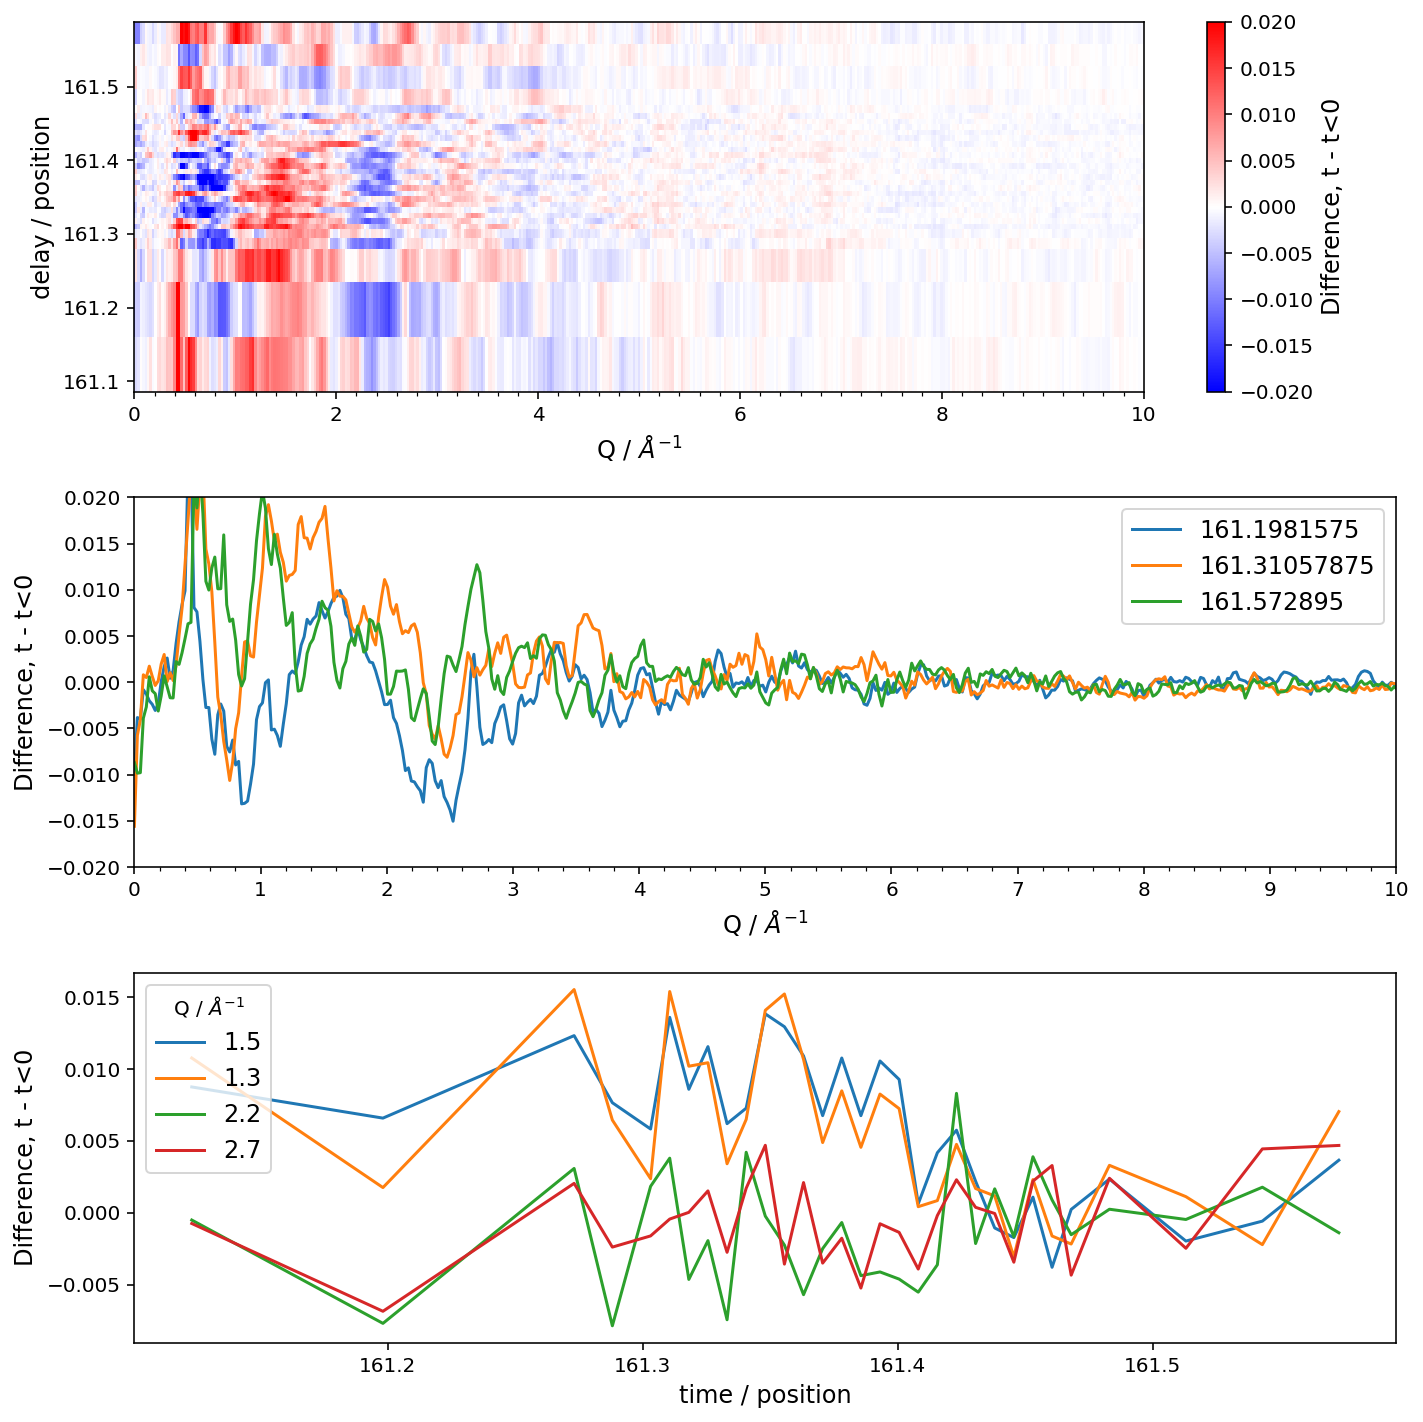

In [19]:
plot_panel_t_minus_negt(data, saveName=f"{fn}_t_minus_t<0_fitCenter_Clean_1.5sigma.pdf", save=True)

In [112]:
# Further filter data to try remove bad quadrants by sigma from mean

Exp.quadsNClean = {}
Exp.quadOutliers(sigma=1.5)

FUNCTION quadOutliers() called to remove Sigma = 1.5 outliers
161.12321 	(75, 450), (70, 450), 	 7% dropped
161.12321 	(75, 450), (70, 450), 	 7% dropped
161.12321 	(75, 450), (67, 450), 	 11% dropped
161.12321 	(75, 450), (67, 450), 	 11% dropped
161.1981575 	(77, 450), (71, 450), 	 8% dropped
161.1981575 	(77, 450), (71, 450), 	 8% dropped
161.1981575 	(77, 450), (71, 450), 	 8% dropped
161.1981575 	(77, 450), (67, 450), 	 13% dropped
161.273105 	(75, 450), (70, 450), 	 7% dropped
161.273105 	(75, 450), (69, 450), 	 8% dropped
161.273105 	(75, 450), (67, 450), 	 11% dropped
161.273105 	(75, 450), (70, 450), 	 7% dropped
161.2880945 	(76, 450), (70, 450), 	 8% dropped
161.2880945 	(76, 450), (69, 450), 	 9% dropped
161.2880945 	(76, 450), (70, 450), 	 8% dropped
161.2880945 	(76, 450), (68, 450), 	 11% dropped
161.303084 	(76, 450), (70, 450), 	 8% dropped
161.303084 	(76, 450), (68, 450), 	 11% dropped
161.303084 	(76, 450), (70, 450), 	 8% dropped
161.303084 	(76, 450), (70, 450), 	

/cds/home/b/bwt/MeV-UED/ued_data_analysis.py:374: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.quadsNClean[delay_unique] = np.array(CleanList)


161.333063 	(74, 450), (66, 450), 	 11% dropped
161.333063 	(74, 450), (68, 450), 	 8% dropped
161.333063 	(74, 450), (67, 450), 	 9% dropped
161.333063 	(74, 450), (67, 450), 	 9% dropped
161.34055775 	(75, 450), (70, 450), 	 7% dropped
161.34055775 	(75, 450), (70, 450), 	 7% dropped
161.34055775 	(75, 450), (70, 450), 	 7% dropped
161.34055775 	(75, 450), (68, 450), 	 9% dropped
161.3480525 	(76, 450), (68, 450), 	 11% dropped
161.3480525 	(76, 450), (70, 450), 	 8% dropped
161.3480525 	(76, 450), (69, 450), 	 9% dropped
161.3480525 	(76, 450), (70, 450), 	 8% dropped
161.35554725 	(75, 450), (67, 450), 	 11% dropped
161.35554725 	(75, 450), (71, 450), 	 5% dropped
161.35554725 	(75, 450), (69, 450), 	 8% dropped
161.35554725 	(75, 450), (66, 450), 	 12% dropped
161.363042 	(75, 450), (68, 450), 	 9% dropped
161.363042 	(75, 450), (69, 450), 	 8% dropped
161.363042 	(75, 450), (68, 450), 	 9% dropped
161.363042 	(75, 450), (69, 450), 	 8% dropped
161.37053675 	(75, 450), (67, 450), 

In [113]:
def allCleanNP():   
    
    quadsNCleanNP = []
    for idx, delay_unique in enumerate(Exp.delays_unique):
        tmp = []
        for quad in (0,1,2,3):
            d = Exp.quadsNClean[delay_unique][quad] # dict lookup
            #print(d.shape)
            dMean = np.mean(d, axis=0) # find mean of a single quadrant
            tmp.append(dMean)
        tmp = np.array(tmp)
        quadsNCleanNP.append(tmp)

    return np.swapaxes(np.array(quadsNCleanNP),1,2)
        
quadsNCleanNP = allCleanNP()
quadsNCleanNP.shape     

(31, 450, 4)

In [114]:
def plot_2d(tmp):
    """Expects a 2D array, Dimensions: delays x pixels"""
    bkgnd_steps=np.arange(-5,0,1)
    bkgnd = tmp[bkgnd_steps]
    print(bkgnd_steps, bkgnd.shape)
    
    pct = (tmp - np.mean(bkgnd,axis=0)) / np.mean(bkgnd, axis=0) * 100
    
    plt.pcolor(pct, vmin=-0.5, vmax=0.5, cmap='bwr')
    cbar = plt.colorbar()
    cbar.set_label('% change')
    plt.show()

[-5 -4 -3 -2 -1] (5, 450)


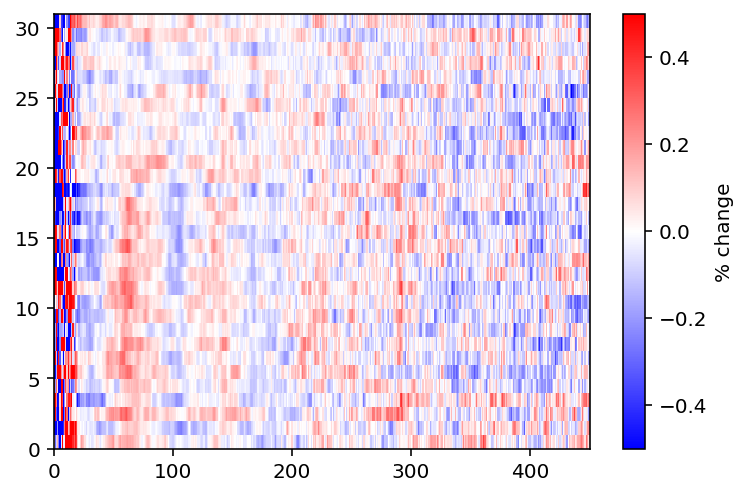

In [115]:
#Plot mean over all quadrants after cleaning outliers with quadOutliers(sigma=...)
plot_2d(np.mean(quadsNCleanNP,axis=-1))

[-5 -4 -3 -2 -1] (5, 450)


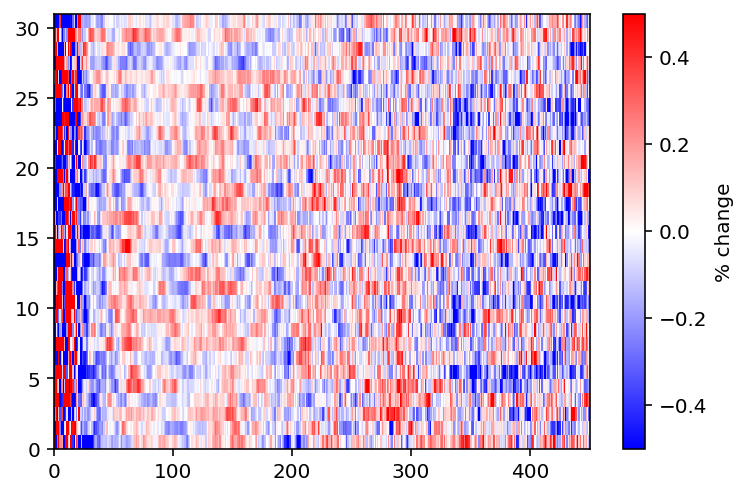

[-5 -4 -3 -2 -1] (5, 450)


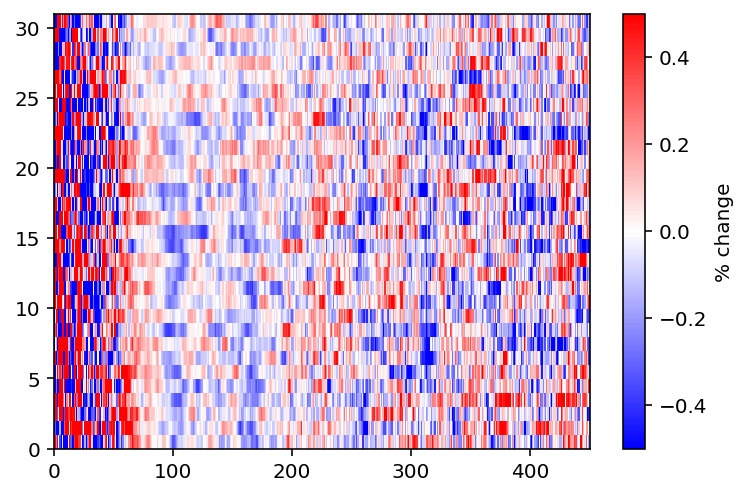

[-5 -4 -3 -2 -1] (5, 450)


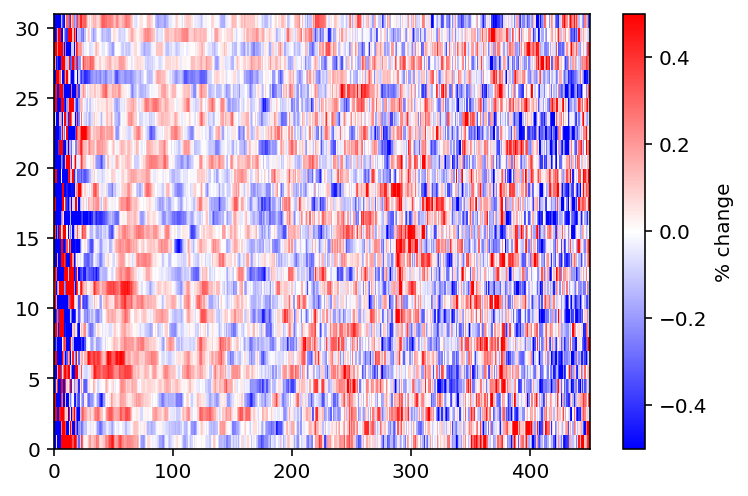

[-5 -4 -3 -2 -1] (5, 450)


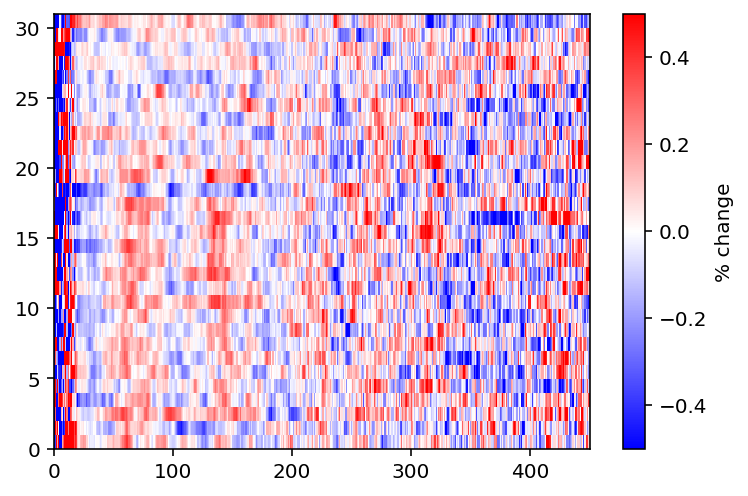

In [26]:
for quad in (0,1,2,3):
    plot_2d(quadsNCleanNP[:,:,quad])

(76, 450)


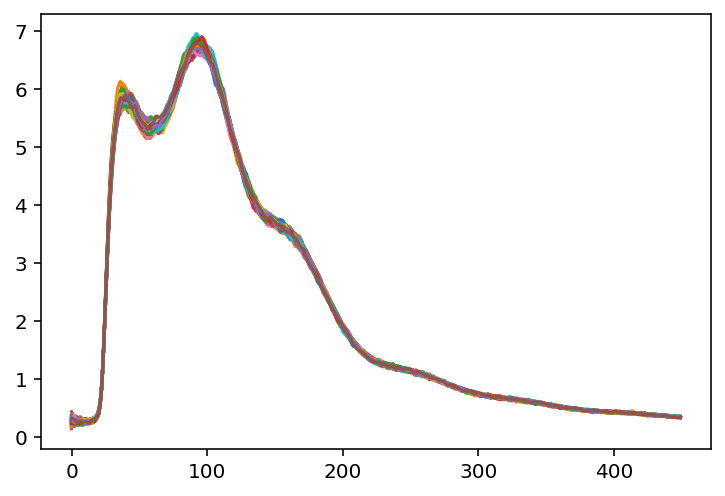

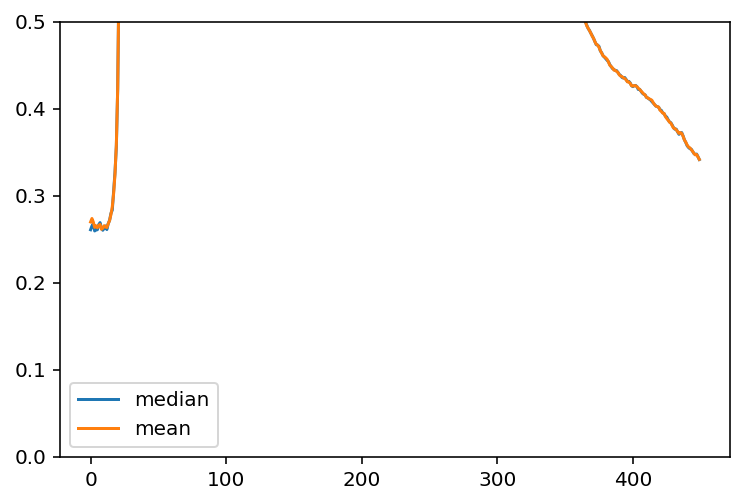

In [27]:
def plot_quadsN(delay=161.273105, quad=0):
    idxs = Exp.delays_dict[delay]
    d = Exp.quadsN[idxs,:,quad]
    print(d.shape)
    plt.plot(np.transpose(d))
    plt.show()
    
    plt.plot(np.median(d, axis=0), label='median')
    plt.plot(np.mean(d, axis=0), label='mean')
    plt.legend()
    plt.ylim(0,0.5)
    plt.show()
    
plot_quadsN()    

(77,) (69,)


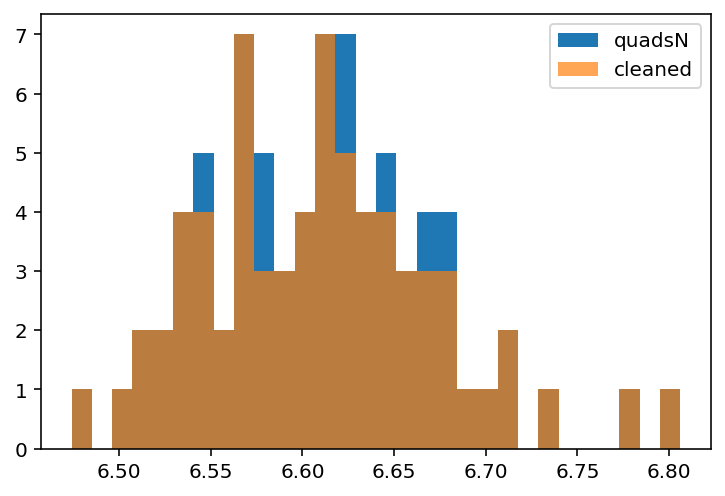

In [28]:
# Clean by rms of radial profile isn't doing a good job unfortunately...

def plot_quadsN_hist(delay=161.572895, quad=0, pix=100):
    idxs = Exp.delays_dict[delay]
    d = Exp.quadsN[idxs,pix,quad]
    dClean = Exp.quadsNClean[delay][quad][:,pix]
    print(d.shape, dClean.shape)
    plt.hist(d, 30, label="quadsN")
    plt.hist(dClean, 30, label="cleaned", alpha=0.7)
    plt.legend()
    plt.show()
    
plot_quadsN_hist()    

# is the mean a good approximation or can we do better with #Kalman-and-Bayesian-Filters-in-Python 

In [29]:
def plot_quadsNClean(delay=161.273105, quad=0):
    d = Exp.quadsNClean[delay][quad]
    print(d.shape)
    plt.plot(np.transpose(d))
    plt.show()

(69, 450)


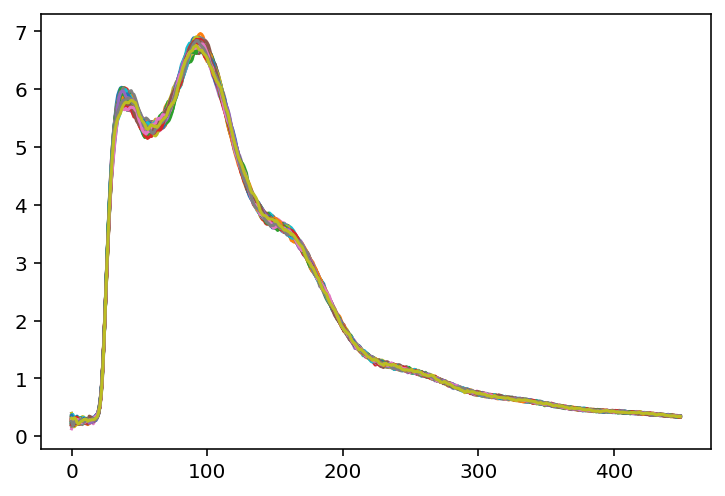

(70, 450)


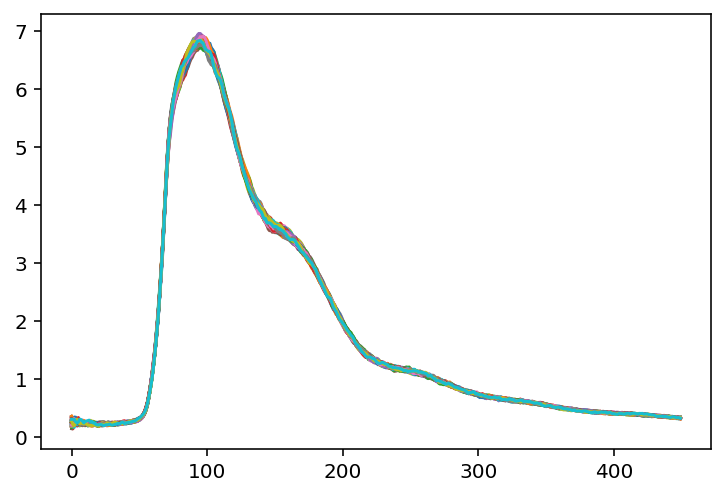

(69, 450)


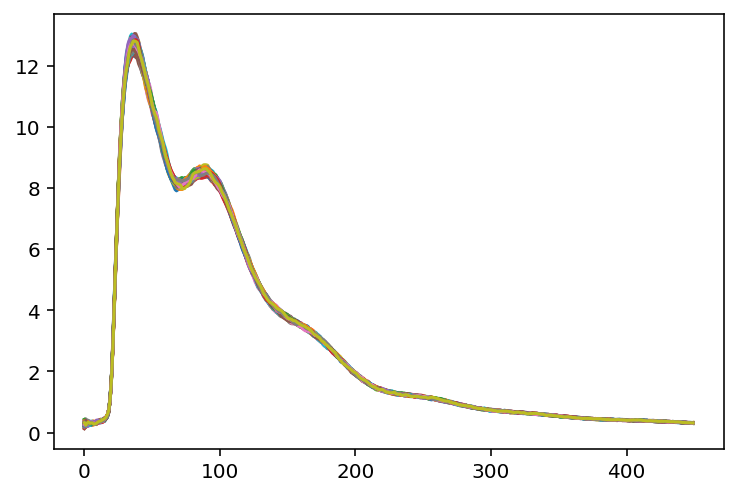

(69, 450)


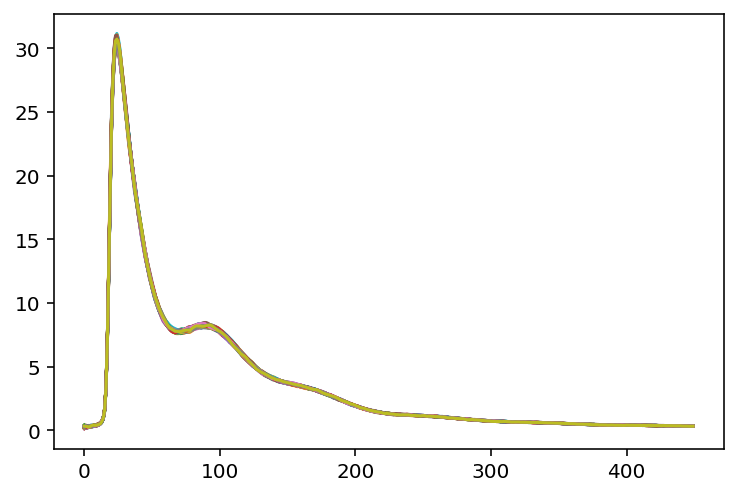

In [30]:
for i in (0,1,2,3):
    plot_quadsNClean(delay=161.572895, quad=i)

In [38]:
# example of dict lookup for a delay step
print(Exp.delays_dict[Exp.delays_unique[-1]])

print(f"Unique delays {len(Exp.delays_unique)}")

[2298, 2299, 2300, 2301, 2302, 2303, 2304, 2305, 2306, 2307, 2308, 2309, 2310, 2311, 2312, 2313, 2314, 2315, 2316, 2317, 2318, 2319, 2320, 2321, 2322, 2323, 2324, 2325, 2326, 2327, 2328, 2329, 2330, 2331, 2332, 2333, 2334, 2335, 2336, 2337, 2338, 2339, 2340, 2341, 2342, 2343, 2344, 2345, 2346, 2347, 2348, 2349, 2350, 2351, 2352, 2353, 2354, 2355, 2356, 2357, 2358, 2359, 2360, 2361, 2362, 2363, 2364, 2365, 2366, 2367, 2368, 2369, 2370, 2371, 2372, 2373, 2374]
Unique delays 31


In [48]:
###### Fixed center finding by turning off Rscaling in the error function.  Probably means an array is accidentally being saved as a float somewhere and the multiplication is causing woe

def fit_1img_center(delay_idx=0, verbose = True):
    cmap = cm.bwr
    vmin1 = 2000
    vmax1 = 10000
    center_guess = Exp.center # as we ran approx_center() during init, should have a good guess already

    center = find_center(Exp, delay_idx) # note that center uses roi (we want to avoid center pixels as ebeam block slightly off-center)
    center.center_i = center_guess # override center with guess
    optf_grad = optimize.minimize(center.err_fn, center.center_i, method='Nelder-Mead')  
    print(f"Delay_key: {Exp.delays_i[delay_idx]} \t Delay_idx: {delay_idx} \t  guess: {center.center_i}, rms: {center.err_fn(center.center_i):.2f}, \t fit center: {optf_grad.x[0]:.2f},  {optf_grad.x[1]:.2f}, rms: {center.err_fn(optf_grad.x):.2f}")
    #centers.append(optf_grad.x)

    if (verbose == True) or (delay_idx < 4):
        fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(14,4))
        ax1.plot(np.log10(center.cart_to_polar_quad(center.center_i)))
        ax1.set_title('Guess' + str(center.center_i)), ax1.set_xlabel('radius (pixel)'), ax1.set_ylabel('Log10 Intensity')

        ax2.plot(np.log10(center.cart_to_polar_quad(optf_grad.x) ))
        ax2.set_title('Fit' + str(optf_grad.x)), ax2.set_xlabel('radius (pixel)'), ax2.set_ylabel('Log10 Intensity')

        cartim = ax3.imshow(center.cart, vmin=vmin1, vmax=vmax1, cmap=cmap, origin = 'lower')
        ax3.set_title('Cartesian input'), ax3.set_xlabel('x (pixel)'), ax3.set_ylabel('y (pixel)')
        cart_pix = 300
        ax3.set_xlim(optf_grad.x[0]+cart_pix,optf_grad.x[0]-cart_pix)
        ax3.set_ylim(optf_grad.x[1]+cart_pix,optf_grad.x[1]-cart_pix)
        ax3.add_patch(Circle(optf_grad.x[::-1], radius=30, color='black'))
        plt.colorbar(cartim, ax=ax3)

        plt.show()


Delay_key: 280_161.19815750 	 Delay_idx: 130 	  guess: [498.34746781 543.96879863], rms: 26.45, 	 fit center: 498.11,  544.31, rms: 26.18


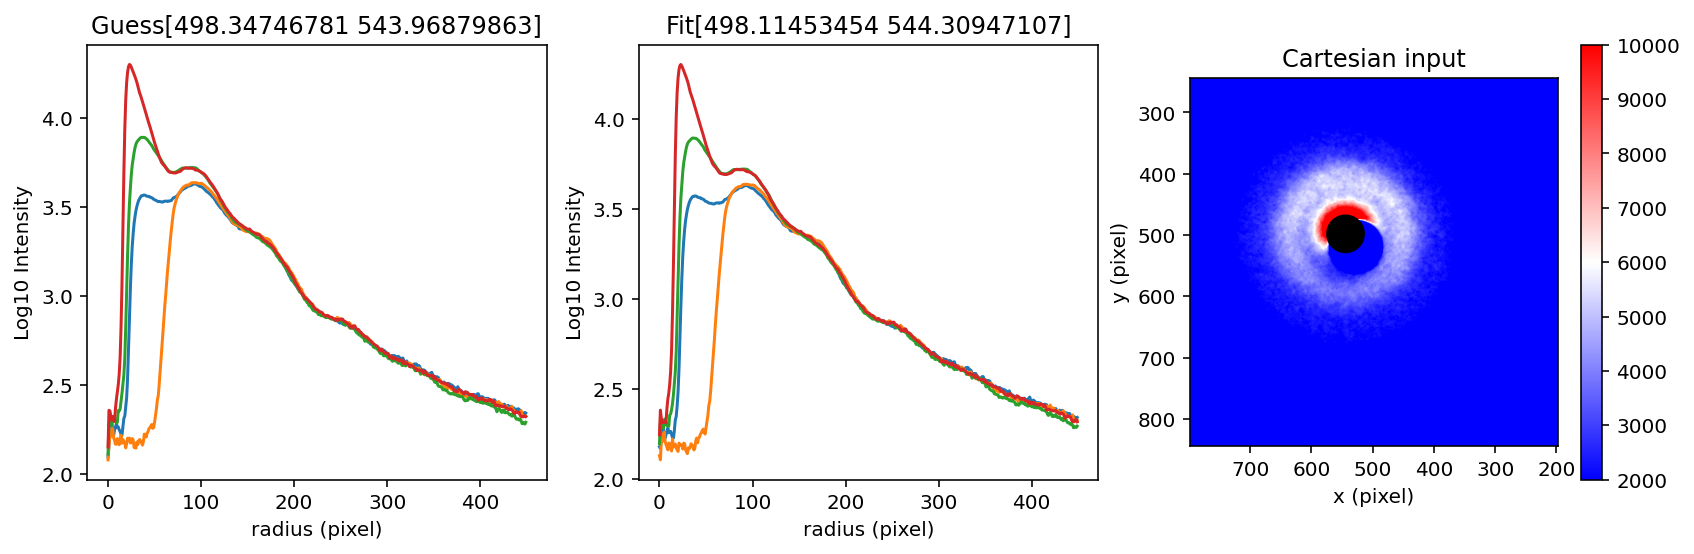

In [49]:
fit_1img_center(delay_idx=130)

Delay_key: 005_161.12321000 	 Delay_idx: 0 	  guess: [498.34746781 543.96879863], rms: 24.61, 	 fit center: 498.58,  544.01, rms: 24.51


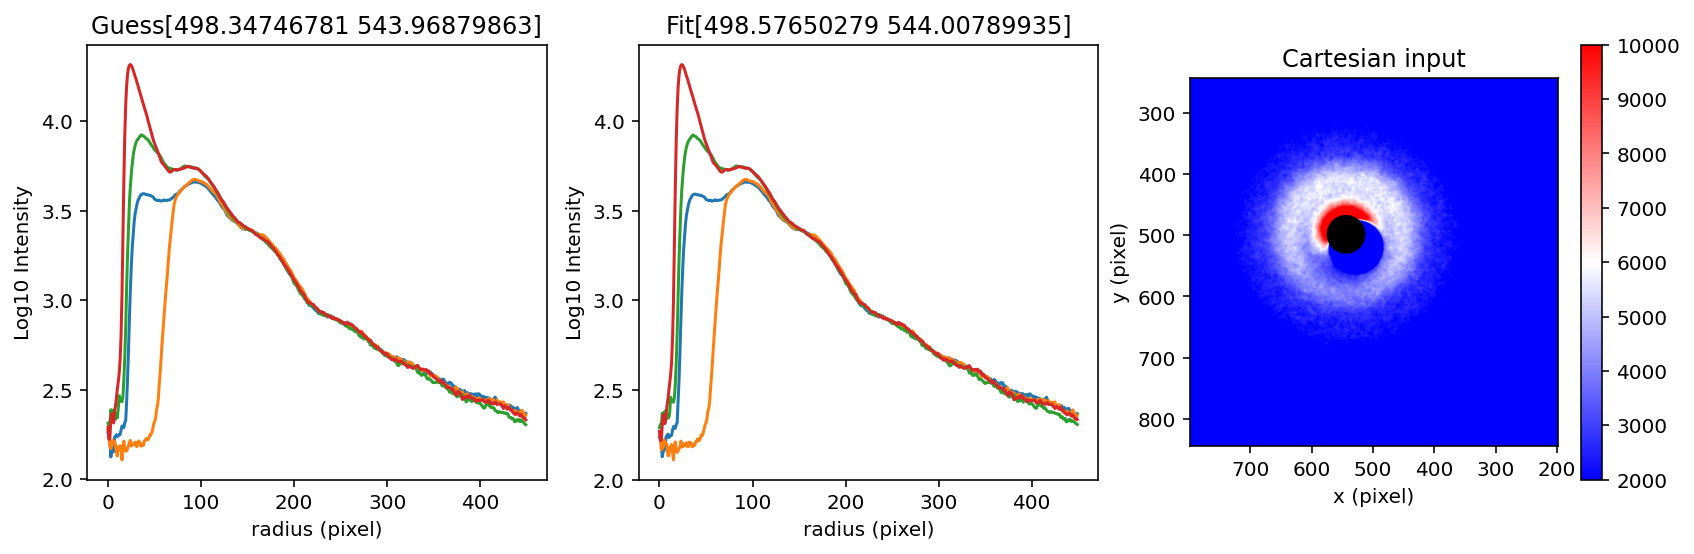

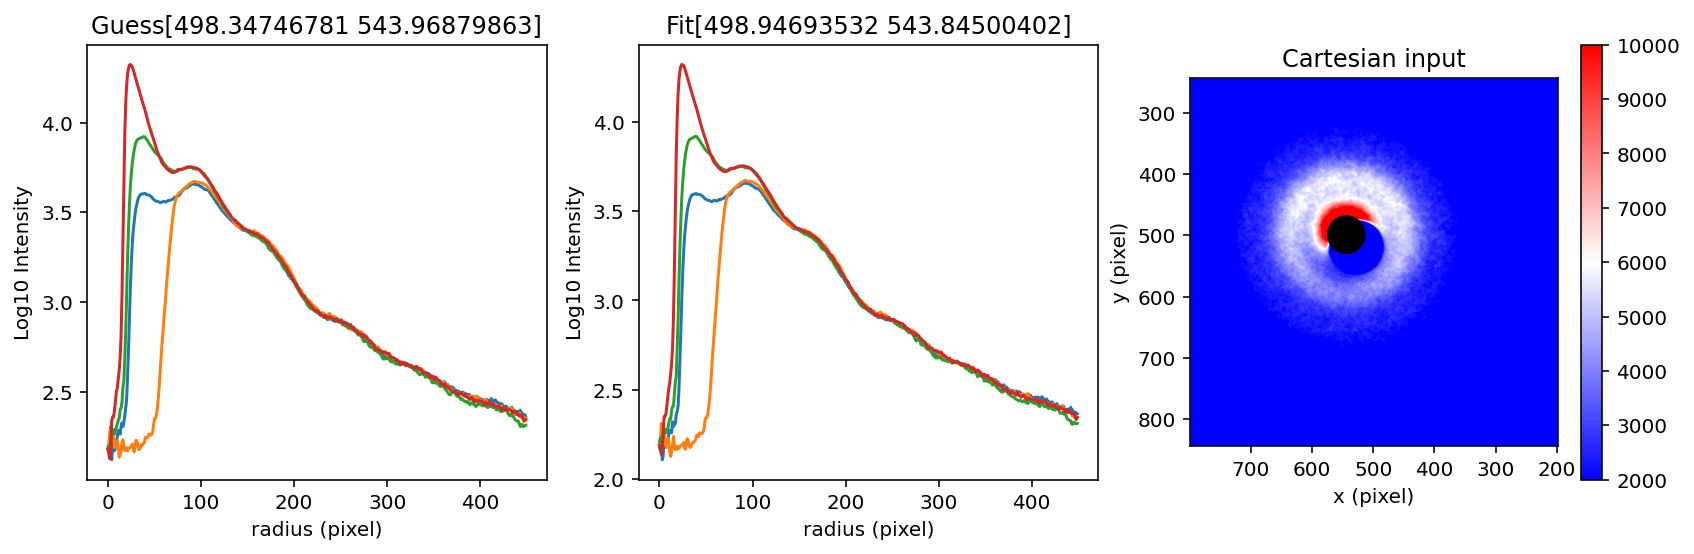

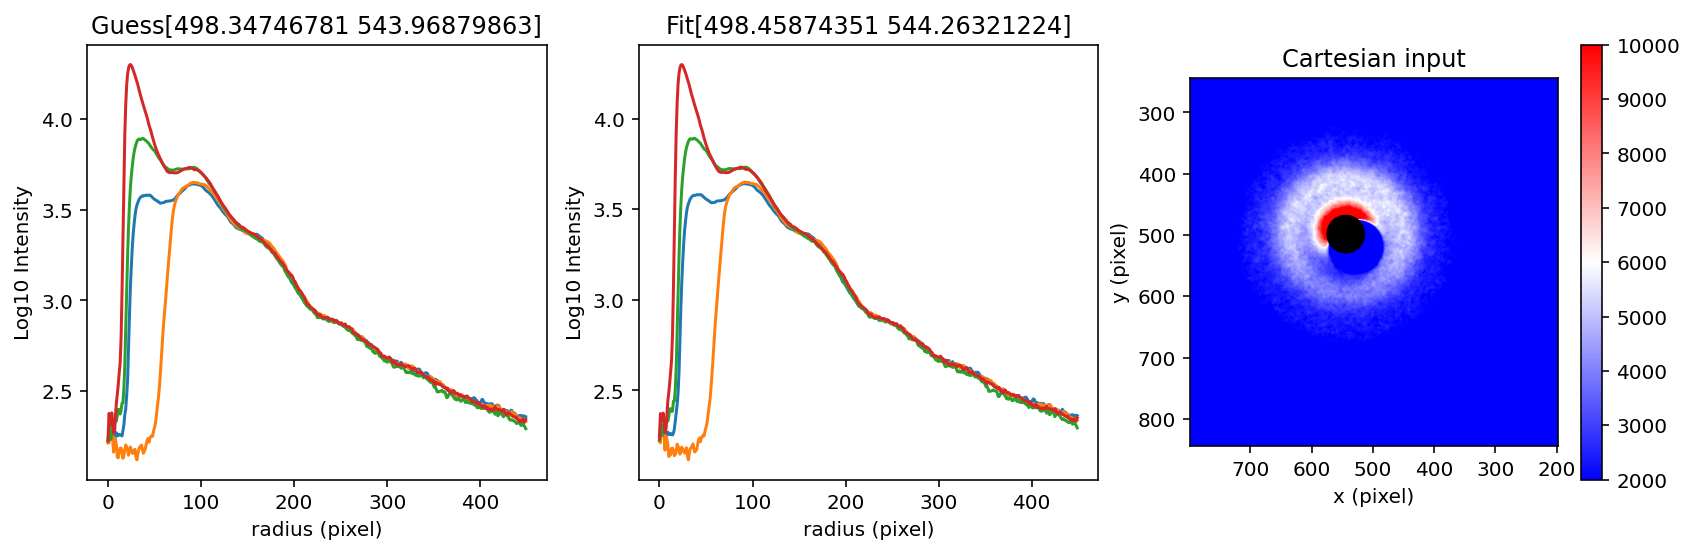

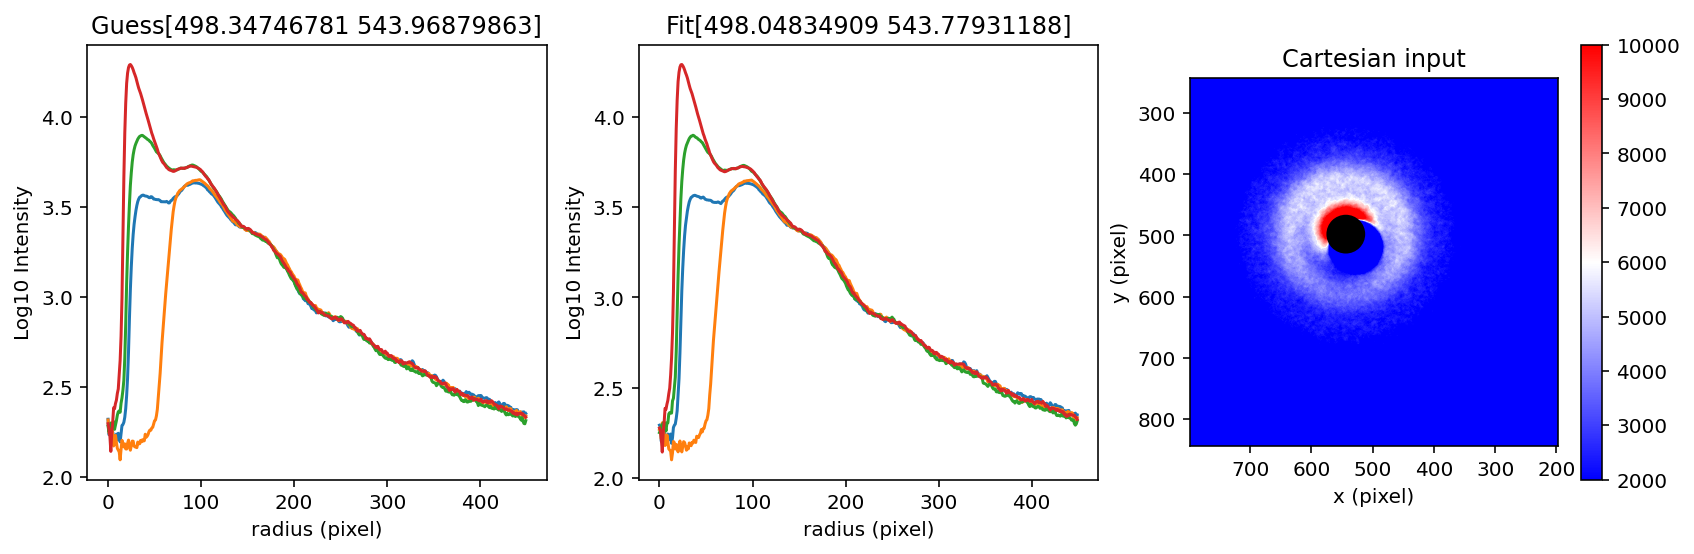

Delay_key: 245_161.12321000 	 Delay_idx: 50 	  guess: [498.34746781 543.96879863], rms: 24.60, 	 fit center: 498.43,  544.35, rms: 24.28
Delay_key: 1585_161.19815750 	 Delay_idx: 100 	  guess: [498.34746781 543.96879863], rms: 26.89, 	 fit center: 498.41,  544.15, rms: 26.81
Delay_key: 906_161.19815750 	 Delay_idx: 150 	  guess: [498.34746781 543.96879863], rms: 26.42, 	 fit center: 498.38,  544.01, rms: 26.39
Delay_key: 2255_161.27310500 	 Delay_idx: 200 	  guess: [498.34746781 543.96879863], rms: 23.82, 	 fit center: 498.61,  543.77, rms: 23.72
Delay_key: 844_161.28809450 	 Delay_idx: 300 	  guess: [498.34746781 543.96879863], rms: 22.74, 	 fit center: 498.14,  543.72, rms: 22.49
Delay_key: 2165_161.30308400 	 Delay_idx: 350 	  guess: [498.34746781 543.96879863], rms: 25.59, 	 fit center: 498.19,  543.57, rms: 25.13
Delay_key: 1374_161.31057875 	 Delay_idx: 400 	  guess: [498.34746781 543.96879863], rms: 29.27, 	 fit center: 498.36,  544.04, rms: 29.25
Delay_key: 726_161.31057875 	 D

In [53]:
# Optional to evaluate this cell, WARNING: finding center of each image is slow!
# Only run if you want to find center using optimize function
# It will replace values in  Exp.quads, Exp.quadsN & Exp.imgN
# Must rerun Exp.quadrants_stats() and Exp.mean_image_each_delay() to update values

centers = []
verbose = False
cmap = cm.bwr
vmin1 = 2000
vmax1 = 10000
center_guess = Exp.center # as we ran approx_center() during init, should have a good guess already

for delay_key, delay_value, delay_idx in Exp.delays_i():
    if (delay_idx in Exp.delays_mask)  &  (delay_idx < 100000): # test with a small number first:
        
        center = find_center(Exp, delay_idx) # note that center uses roi (we want to avoid center pixels as ebeam block slightly off-center)
        center.center_i = center_guess # override center with guess
        optf_grad = optimize.minimize(center.err_fn, center.center_i, method='Nelder-Mead')  
        if (verbose == True) or (delay_idx%50 == 0):
            print(f"Delay_key: {Exp.delays_i[delay_idx]} \t Delay_idx: {delay_idx} \t  guess: {center.center_i}, rms: {center.err_fn(center.center_i):.2f}, \t fit center: {optf_grad.x[0]:.2f},  {optf_grad.x[1]:.2f}, rms: {center.err_fn(optf_grad.x):.2f}")
        centers.append(optf_grad.x)

        Exp.quads[delay_idx, :, :] = np.array(center.cart_to_polar_quad(optf_grad.x, Rscaling=False)) # recalculate with optimized center
        intensity_in_region = np.mean(Exp.quads[delay_idx,Exp.normRegion[0]:Exp.normRegion[1]],axis=0)
        # now add normalized traces into exp object
        Exp.quadsN[delay_idx] = Exp.quads[delay_idx] / intensity_in_region
        Exp.imgN[delay_idx]   = Exp.img_m[delay_idx] / np.mean(intensity_in_region)
            
        if (verbose == True) or (delay_idx < 4):
            fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(14,4))
            ax1.plot(np.log10(center.cart_to_polar_quad(center.center_i)))
            ax1.set_title('Guess' + str(center.center_i)), ax1.set_xlabel('radius (pixel)'), ax1.set_ylabel('Log10 Intensity')

            #Use selected quadrants for optimiziation: useQuadrants=(1,2,3) 
            ax2.plot(np.log10(center.cart_to_polar_quad(optf_grad.x) ))
            ax2.set_title('Fit' + str(optf_grad.x)), ax2.set_xlabel('radius (pixel)'), ax2.set_ylabel('Log10 Intensity')

            cartim = ax3.imshow(center.cart, vmin=vmin1, vmax=vmax1, cmap=cmap, origin = 'lower')
            ax3.set_title('Cartesian input'), ax3.set_xlabel('x (pixel)'), ax3.set_ylabel('y (pixel)')
            cart_pix = 300
            ax3.set_xlim(optf_grad.x[0]+cart_pix,optf_grad.x[0]-cart_pix)
            ax3.set_ylim(optf_grad.x[1]+cart_pix,optf_grad.x[1]-cart_pix)
            ax3.add_patch(Circle(optf_grad.x[::-1], radius=30, color='black'))
            plt.colorbar(cartim, ax=ax3)

            plt.show()


Exp.quadrants_stats()
Exp.mean_image_each_delay()    

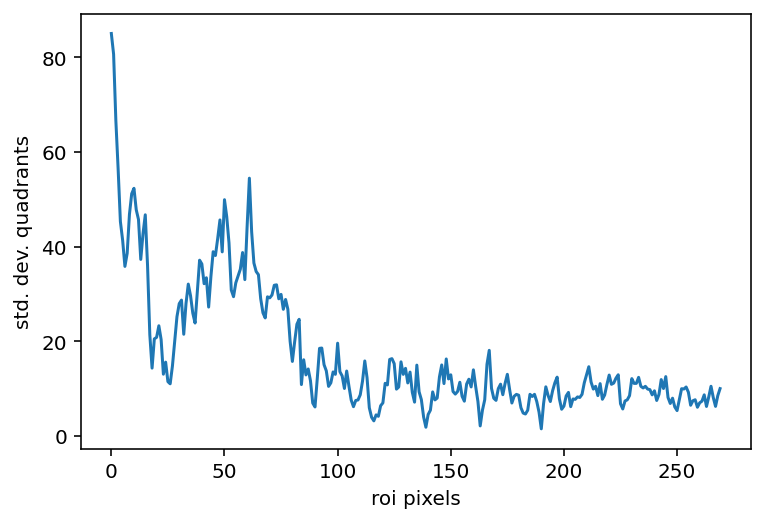

In [54]:
fig, ax = plt.subplots(ncols=1, figsize=(6,4))
plt.plot(center.temp)
ax.set_xlabel('roi pixels')
ax.set_ylabel('std. dev. quadrants')
plt.show()

Mean x:  498.37, y:  544.01


Text(0, 0.5, 'center (pixel)')

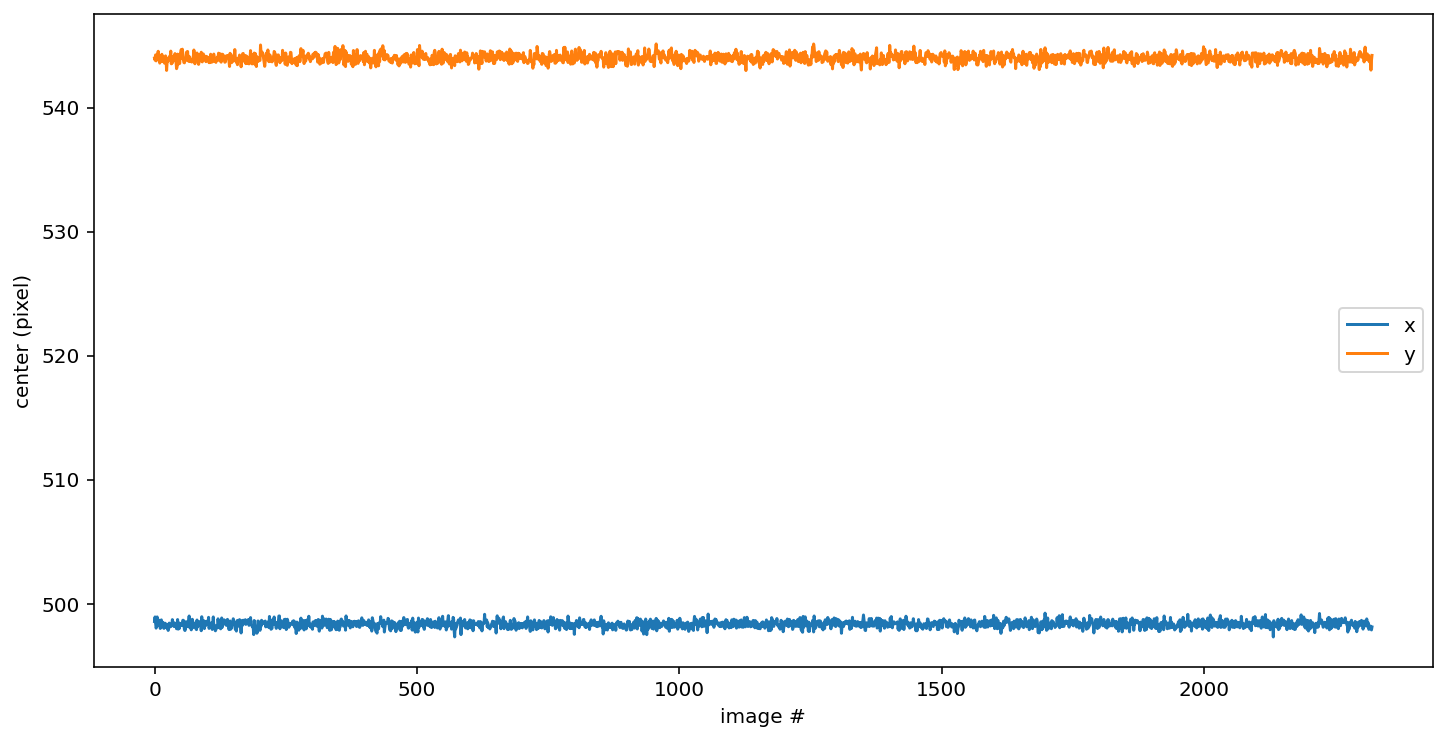

In [55]:
# WARNING, plot sorted by dict order, not acquisition! 

x = np.array(centers)[:,0] 
y = np.array(centers)[:,1]
print(f"Mean x: {np.mean(x): .2f}, y: {np.mean(y): .2f}")

fig, ax = plt.subplots(ncols=1, figsize=(12,6))
plt.plot(x, label='x')
plt.plot(y, label='y')
plt.legend()
ax.set_xlabel('image #')
ax.set_ylabel('center (pixel)')


Mean x:  498.37, y:  544.01


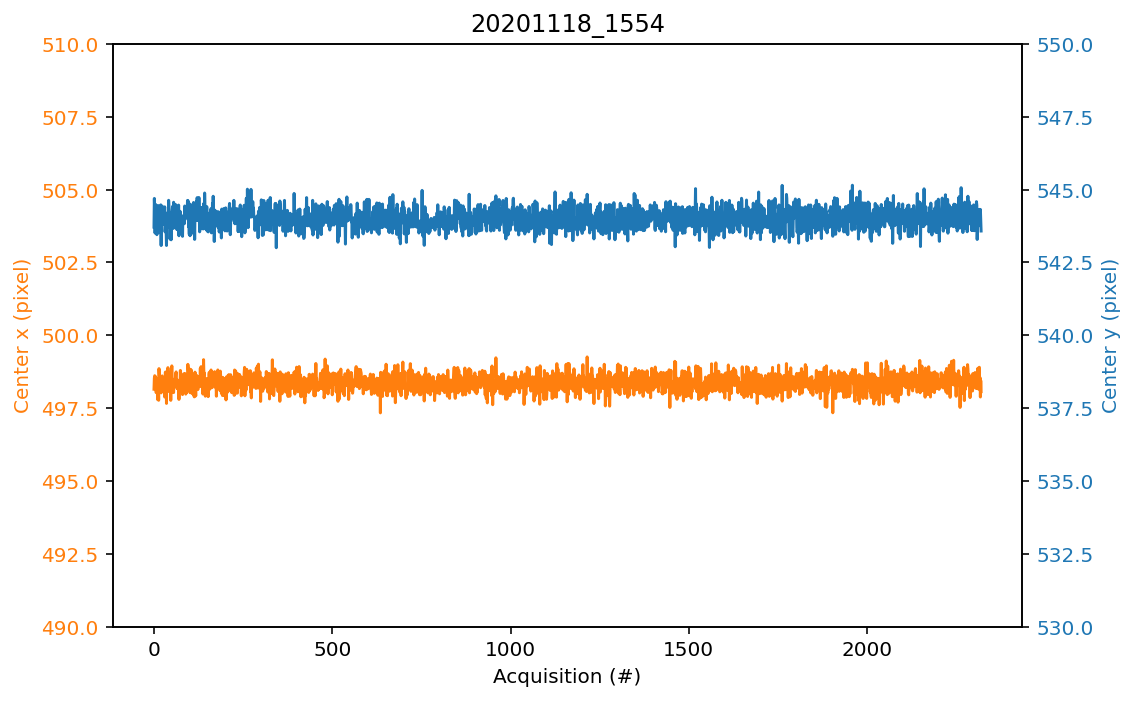

In [56]:
# sorted by acq. #, could also try np argsort()

cntr =  Exp.delays_cnt 
xsorted = [x for _,x in sorted(zip(cntr,x))]
ysorted = [y for _,y in sorted(zip(cntr,y))]
print(f"Mean x: {np.mean(x): .2f}, y: {np.mean(y): .2f}")

fig, ax1 = plt.subplots(figsize=(8,5))
ax1.set_title(f'{fn}')

color = 'tab:orange'
ax1.set_xlabel('Acquisition (#)')
ax1.set_ylabel('Center x (pixel)', color=color)
ax1.plot(xsorted, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(490,510)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim(530,550)

color = 'tab:blue'
ax2.set_ylabel('Center y (pixel)', color=color)  # we already handled the x-label with ax1
#ax2.plot(t, data2, color=color)
ax2.plot(ysorted, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(f'{fn}_center_vs_time.jpg')
plt.show()


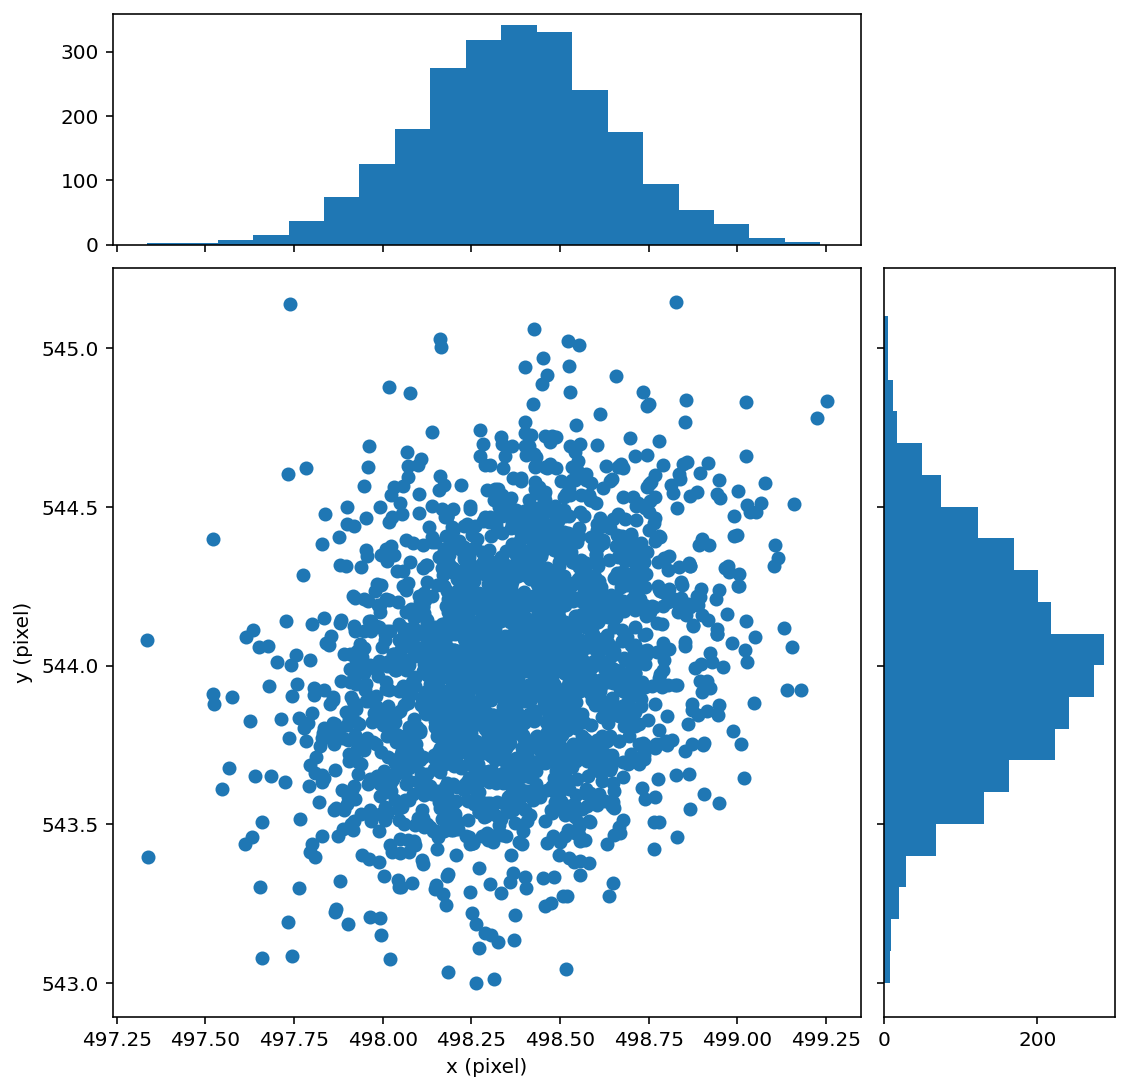

In [57]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)
    ax.set_xlabel('x (pixel)'), ax.set_ylabel('y (pixel)')

    # now determine nice limits by hand:
    binwidth = 0.1
    xymax = max(np.mean(x)+np.std(x), np.mean(y)+np.std(y))
    xymin = max(np.mean(x)-np.std(x), np.mean(y)-np.std(x))
    #lim = (int(xymax/binwidth) + 1) * binwidth

    binsx = np.arange(np.min(x), np.max(x), binwidth)
    binsy = np.arange(np.min(y), np.max(y), binwidth)
    ax_histx.hist(x, bins=binsx)
    ax_histy.hist(y, bins=binsy, orientation='horizontal')
    
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
scatter_hist(x, y, ax, ax_histx, ax_histy)

plt.savefig(f'{fn}_center_correlation.pdf')
plt.show()


In [58]:
crude_center = False

if crude_center:
    # Recompute data with a guess of the center (quick method)
    Exp.center = np.array([501.27,  547.69])
    Exp.quadrants()
    Exp.quadrants_stats()
    Exp.mean_image_each_delay() 

Q: [1.5, 1.3, 2.2, 2.7], pixels: [63, 55, 93, 114]


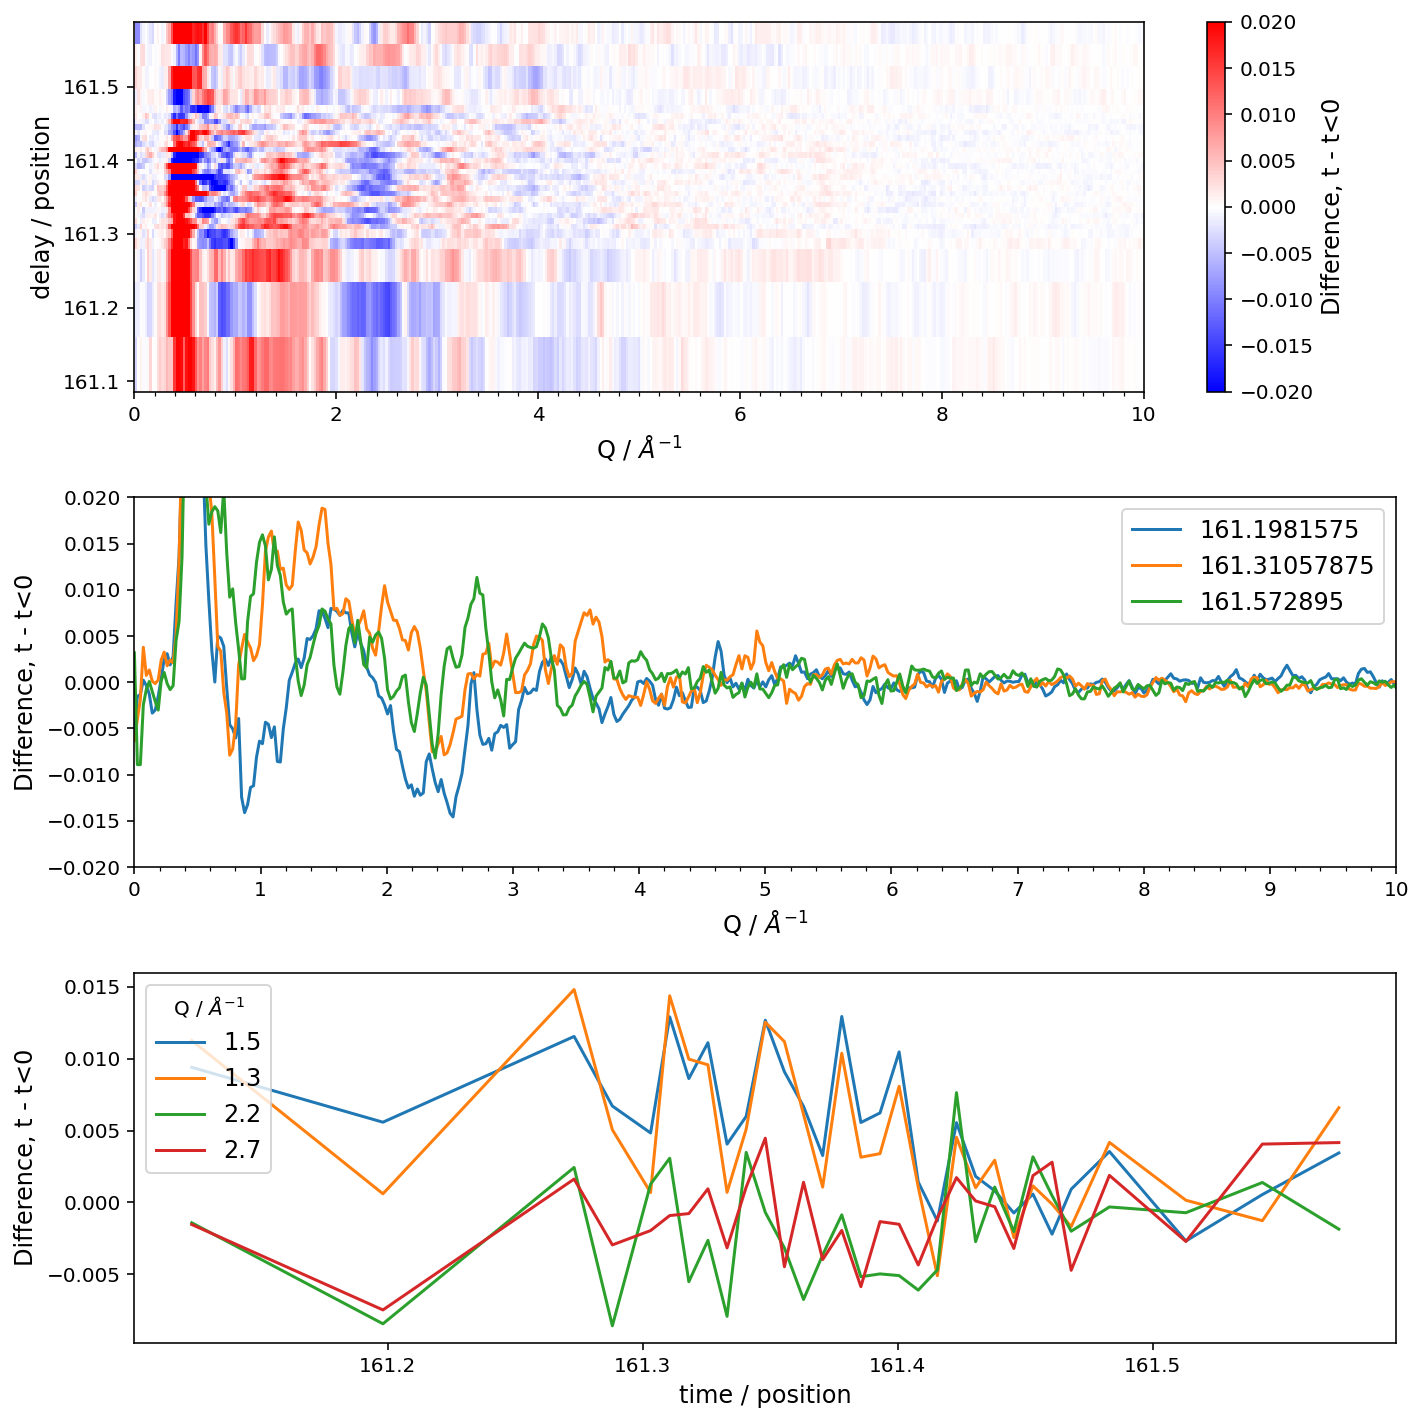

In [102]:
fig, (ax1, ax3, ax4) = plt.subplots(ncols=1, nrows = 3, figsize=(10,10))

#c = 299792458
#t0 = 1000
#taxis = t0 + (Exp.delays_unique-max(Exp.delays_unique))*2*c/1E5
qaxis = np.linspace(0,Exp.maxRadius*0.02355,Exp.maxRadius)
sub = [-8,-1]
data = np.mean(Exp.meanquadsN[:,:,:],axis=2)-np.mean(Exp.meanquadsN[sub[0]:sub[1],:,:],axis=(0,2))

cmap = 'bwr'  #cmap = cm.PuBu_r
vscale = 0.02
#cartim1 = ax1.pcolormesh(qaxis,taxis,pd, shading='auto', cmap=cmap, vmin=-4, vmax=4)
cartim1 = ax1.pcolormesh(qaxis,Exp.delays_unique,data, shading='auto', cmap=cmap, vmin=-vscale, vmax=vscale)
ax1.xaxis.set_minor_locator(AutoMinorLocator(10))
ax1.set_xlim(0,10)
ax1.set_xlabel('Q / $\AA^{-1}$', fontsize='large'), ax1.set_ylabel('delay / position', fontsize='large')
cbar = plt.colorbar(cartim1, ax=ax1)
cbar.set_label("Difference, t - t<0", fontsize='large')

delays = [1, 5, len(Exp.delays_unique)-1]
speclabels = [f'{Exp.delays_unique[step]}' for step in delays]
spectr = np.transpose([data[d] for d in delays])
ax3.plot(qaxis, spectr)
ax3.xaxis.set_major_locator(MultipleLocator(1))
ax3.xaxis.set_minor_locator(AutoMinorLocator(5))
ax3.set_xlabel('Q / $\AA^{-1}$', fontsize='large'), ax3.set_ylabel('Difference, t - t<0', fontsize='large')#, ax4.set_aspect(1)
ax3.legend(speclabels, fontsize='large')
ax3.set_xlim(0,10)
ax3.set_ylim(-vscale,vscale)

qs = [1.5, 1.3, 2.2, 2.7]
pixels = [ int(q/0.02355) for q in qs]
print(f"Q: {qs}, pixels: {pixels}")
transients = np.transpose([np.mean(data[:,pix-10:pix+10],axis=1) for pix in pixels])
#ax4.plot(taxis, transients)
ax4.plot(Exp.delays_unique, transients)
ax4.set_xlabel('time / position', fontsize='large'), ax4.set_ylabel('Difference, t - t<0', fontsize='large')#, ax4.set_aspect(1)
ax4.legend(qs, fontsize='large', title='Q / $\AA^{-1}$')  

plt.tight_layout()
plt.show()
fig.savefig(f"{fn}_t_minus_t<0_fitCenter.pdf")  

In [59]:
# (unique delays ~31 x  maxRadius ~450 x quadrants ~4), N = normalized
Exp.meanquadsN.shape

(31, 450, 4)

In [103]:
# Next task is to try remove noise from dataset

def plot_all_acq_1quad_1delay(quad=0, step=0):

    delay_indices = Exp.delays_dict[Exp.delays_unique[step]]
    data = Exp.quadsN[delay_indices ,:,quad]
    print(data.shape)
    return np.transpose(data)

(77, 450)


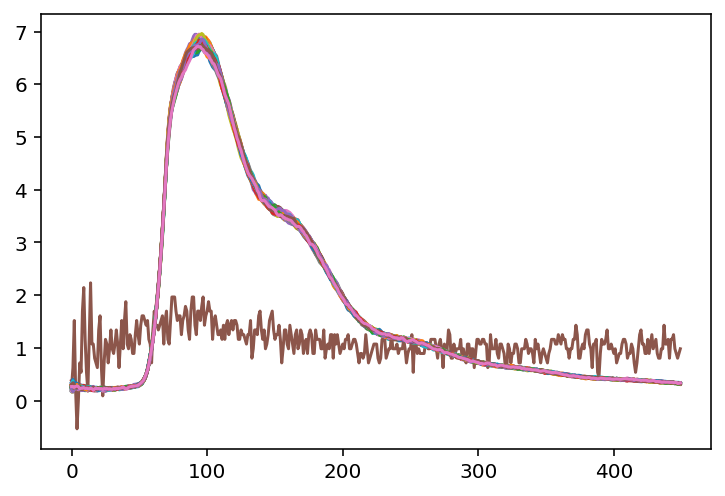

In [104]:
# Quick sanity check for bad acquisitions
# Why are we getting bad data points?
d = plot_all_acq_1quad_1delay(quad=1, step=7)
plt.plot(d)
plt.show()

# need to modify to remove masked images

In [66]:
def plot_all_acq_1quad_1delay_masked(quad=0, step=0):
    delay_indices = Exp.delays_dict[Exp.delays_unique[step]]
    hit_idxs = np.intersect1d(delay_indices, Exp.delays_mask) 
    data = Exp.quadsN[hit_idxs ,:,quad]
    print(data.shape)
    return np.transpose(data)

(76, 450)


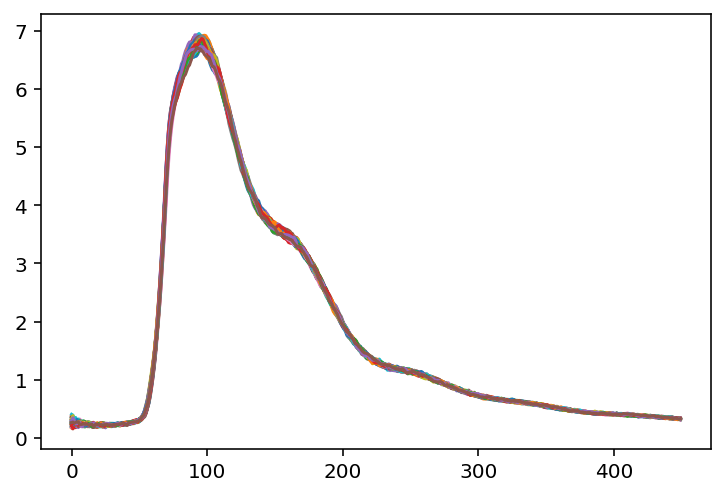

In [72]:
# Outliers should be removed if the delays_mask is correct!
d = plot_all_acq_1quad_1delay_masked(quad=1, step=7)
plt.plot(d)
plt.show()

In [97]:
# What does the data look like if we try to make a deltaOD map?
# We don't have unpumped spectra but we do have t<0. e.g. steps=np.arange(-7,0,1)
# Will have to take ratio of mean values but that is exactly what the PCT_diff dI/I plots do already, so this certainly isn't any worse...
bkgnd_steps=np.arange(-9,0,1)
print(Exp.delays_unique[bkgnd_steps])

def calcOD(bkgnd_steps):
    
    delay_pos = Exp.delays_unique[bkgnd_steps]
    delay_indices = np.concatenate([Exp.delays_dict[p] for p in delay_pos])
    hit_idxs = np.intersect1d(delay_indices, Exp.delays_mask) 
    ref = np.mean(Exp.quadsN[hit_idxs,:,:], axis=-1)
    print(ref.shape)
    refM = np.mean(ref, axis=0)
    
    sig = []
    sigM = []
    for idx, delay_unique in enumerate(Exp.delays_unique):
        acq_idxs = Exp.delays_dict[delay_unique] # for position 161.273105 returns [0,1,2,3]  etc. 
        hit_idxs = np.intersect1d(acq_idxs, Exp.delays_mask) # only use hits
        sig_i = np.mean(Exp.quadsN[hit_idxs ,:,:], axis=-1)  # mean over quadrants
        sig.append(sig_i)
        sigM.append(np.mean(sig_i, axis=0))
    
    
    sigM = np.array(sigM)
    return ref, sig, refM, sigM

ref, sig, refM, sigM = calcOD(bkgnd_steps)
print(ref.shape, len(sig), refM.shape, sigM.shape)

[161.4379895  161.44548425 161.452979   161.46047375 161.4679685
 161.482958   161.512937   161.542916   161.572895  ]
(675, 450)
(675, 450) 31 (450,) (31, 450)


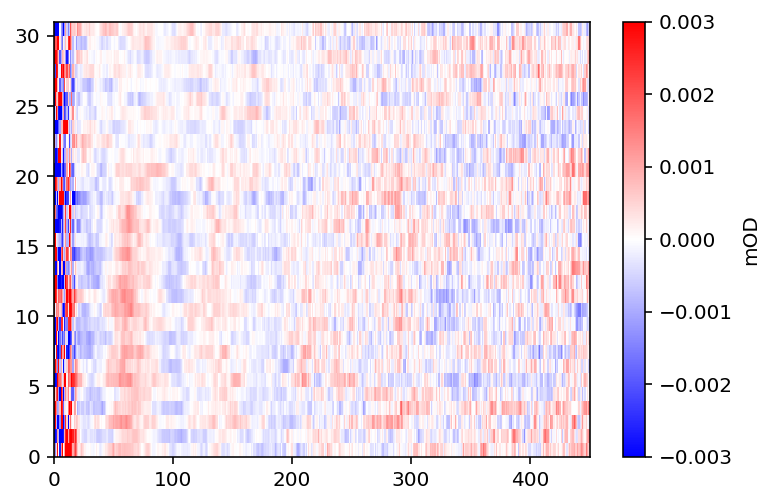

In [98]:
od = np.log10(sigM/refM)
od.shape

plt.pcolor(od, vmin=-0.003, vmax=0.003, cmap='bwr')
cbar = plt.colorbar()
cbar.set_label('mOD')
plt.show()

(675, 450) (675,) (577, 450)


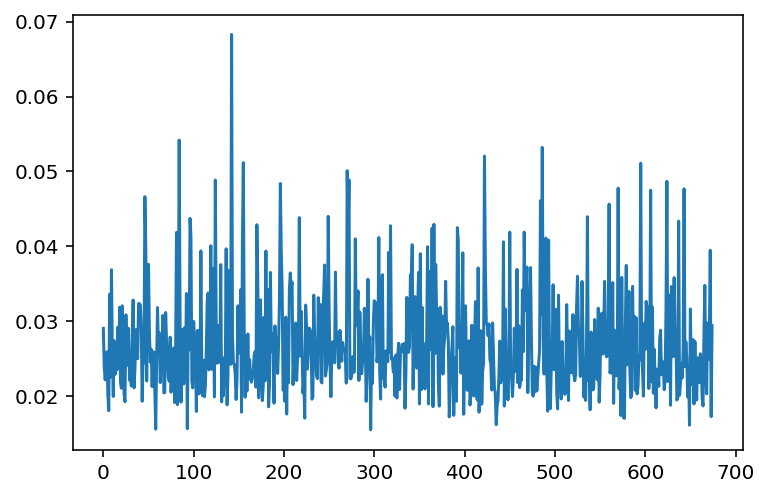

In [105]:
# Removing outliers based on std dev. works nicely. Seems to be working better than QuadOutliers()?
# Need to reimplement this 

sigClean = []
sigMClean = []
# loop over each delay
for idx, sig_i in enumerate(sig): 
    rms = np.array([np.sqrt(np.mean(np.square(obs-np.mean(sig_i,axis=0) ))) for obs in sig_i]) #  calculate rms of 450 pixel spectrum
    Clean = sig_i[rms < np.mean(rms) + 1.0*np.std(rms)] # keep those with an rms < 1 sigma deviation
    #print(idx, sig_i.shape, Clean.shape)
    sigClean.append(Clean)
    sigMClean.append(np.mean(Clean,axis=0))
sigMClean = np.array(sigMClean)    


rms= np.array([np.sqrt(np.mean(np.square(obs-np.mean(ref,axis=0) ))) for obs in ref]) 
refClean = ref[rms < np.mean(rms) + 1.0*np.std(rms)]
print(ref.shape, rms.shape, refClean.shape)
    
plt.plot(rms, label='raw')
plt.show()
refMClean = np.mean(refClean,axis=0) 

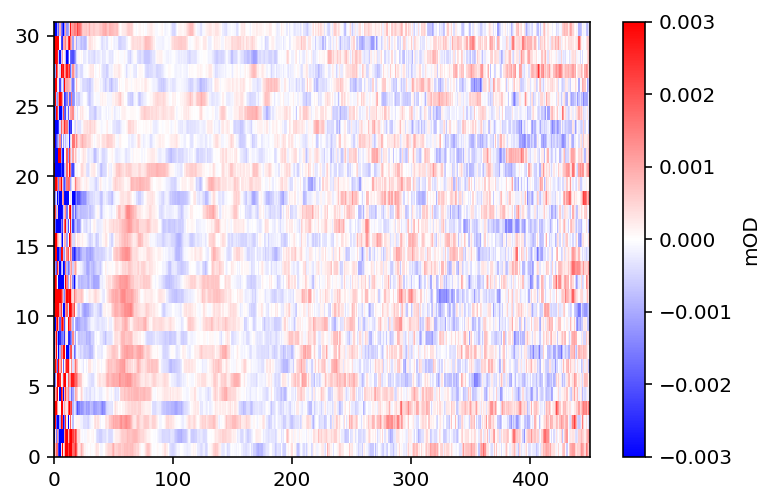

In [121]:
# Compare this map to the one above to see if the Clean by std dev from the mean is working
odClean = np.log10(sigMClean/refMClean)

plt.pcolor(odClean, vmin=-0.003, vmax=0.003, cmap='bwr')
cbar = plt.colorbar()
cbar.set_label('mOD')
plt.show()

In [107]:
def pct_diff(Exp, substeps=[-5,-1]):
    """Labelled dI/I in the matplot scripts, see Eq. 1 in Simultaneous observation of nuclear and electronic dynamics by ultrafast electron diffraction
    Jie Yang, Xiaolei Zhu, J. Pedro F. Nunes, Jimmy K. Yu, Robert M. Parrish, Thomas J. A. Wolf, Martin Centurion, Markus Gühr, Renkai Li, Yusong Liu, Bryan Moore, Mario Niebuhr, Suji Park, Xiaozhe Shen, Stephen Weathersby, Thomas Weinacht, Todd J. Martinez and Xijie Wang
    Science 368 (6493), 885-889. DOI: 10.1126/science.abb2235
    Returns a (nSteps x nPixels) shape
    """
    point = np.mean(Exp.meanquadsN[:,:,:],axis=2) # axis=2 takes mean over detector quadrants
    negtime = np.mean(Exp.meanquadsN[substeps[0]:substeps[1],:,:],axis=(0,2))
    
    return (point - negtime) / negtime *100

Q: [1.5, 1.3, 2.2, 2.7], pixels: [63, 55, 93, 114]


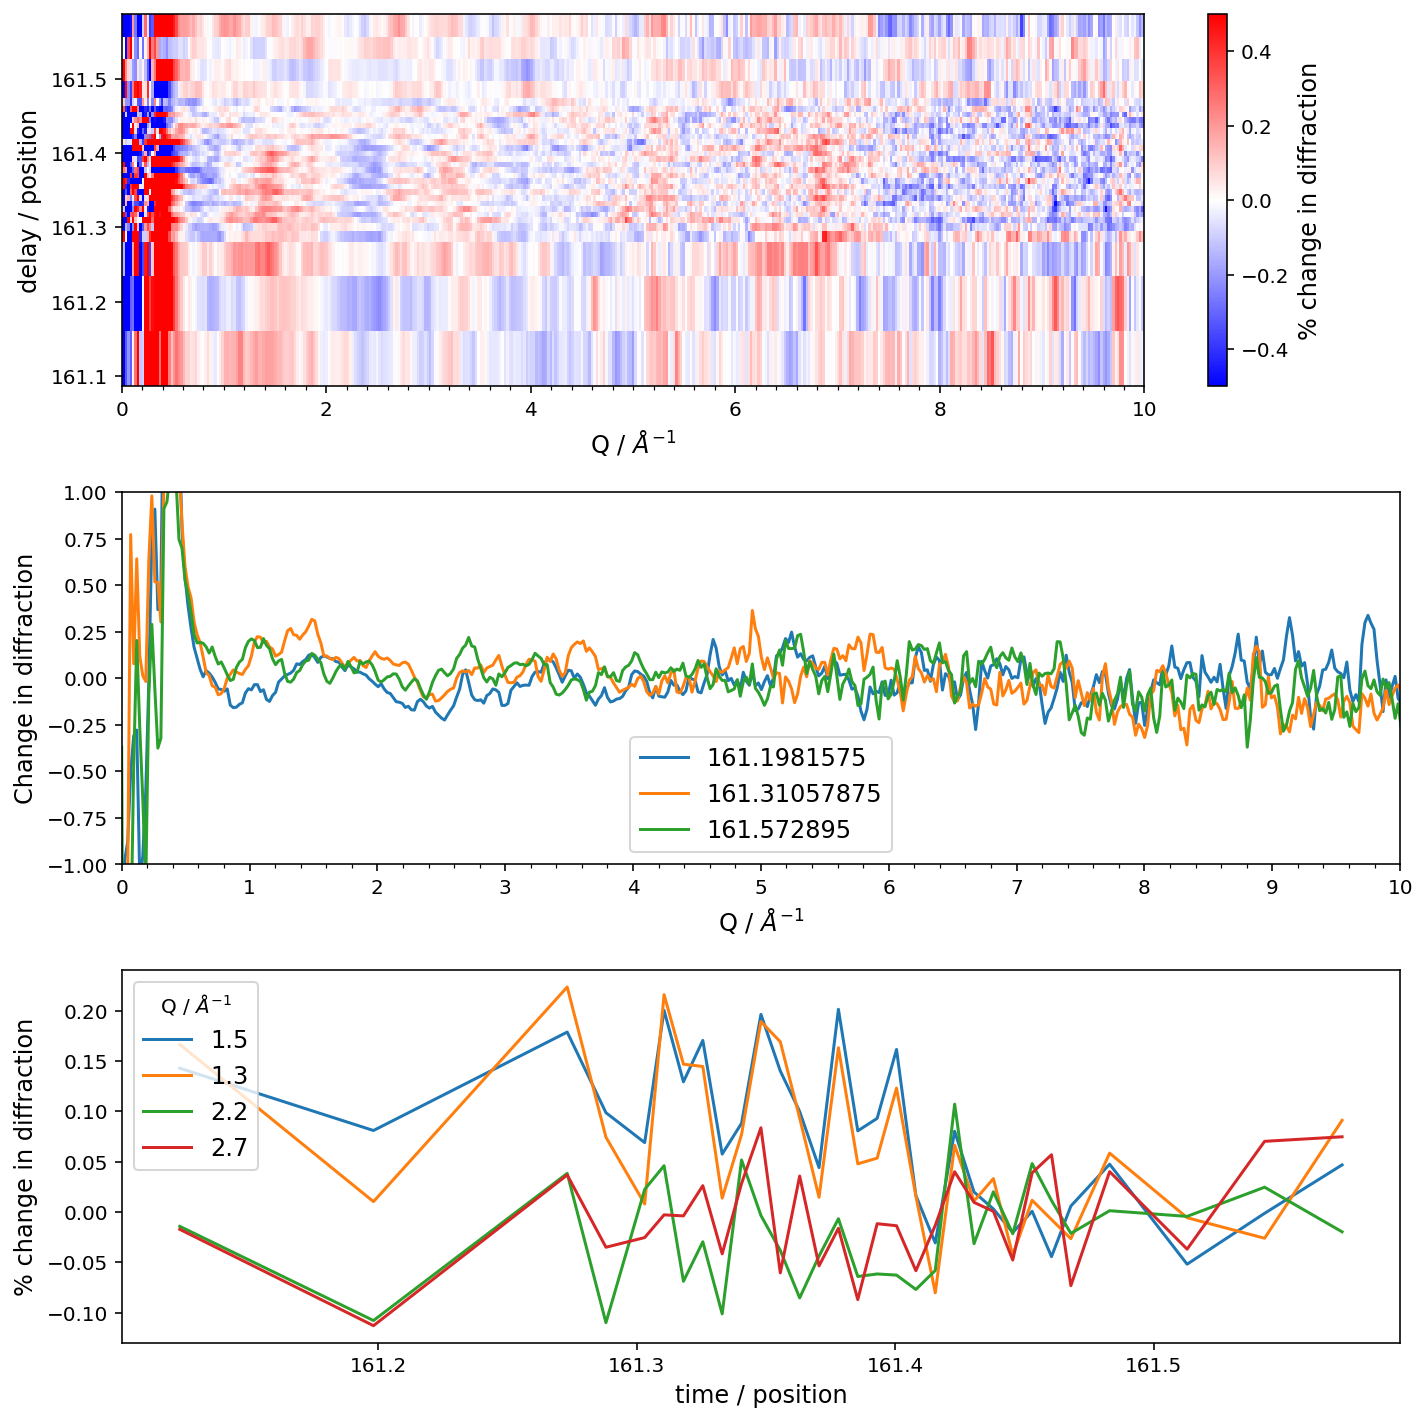

In [108]:
cmap = 'bwr'  #cmap = cm.PuBu_r
cart_pix = 300
delays = [1, 5, len(Exp.delays_unique)-1]
speclabels = [f'{Exp.delays_unique[step]}' for step in delays]
qs = [1.5, 1.3, 2.2, 2.7]
pixels = [ int(q/0.02355) for q in qs]
print(f"Q: {qs}, pixels: {pixels}")

fig, (ax1, ax3, ax4) = plt.subplots(ncols=1, nrows = 3, figsize=(10,10))

c = 299792458
t0 = 1000
taxis = t0 + (Exp.delays_unique-max(Exp.delays_unique))*2*c/1E5
qaxis = np.linspace(0,Exp.maxRadius*0.02355,Exp.maxRadius)
pd = pct_diff(Exp) # Labelled dI/I in the Matlab scripts,  (nSteps x nPixels) shape

#cartim1 = ax1.pcolormesh(qaxis,taxis,pd, shading='auto', cmap=cmap, vmin=-4, vmax=4)
cartim1 = ax1.pcolormesh(qaxis,Exp.delays_unique,pd, shading='auto', cmap=cmap, vmin=-0.5, vmax=0.5)
ax1.xaxis.set_minor_locator(AutoMinorLocator(10))
ax1.set_xlim(0,10)
ax1.set_xlabel('Q / $\AA^{-1}$', fontsize='large'), ax1.set_ylabel('delay / position', fontsize='large')
cbar = plt.colorbar(cartim1, ax=ax1)
cbar.set_label("% change in diffraction", fontsize='large')

spectr = np.transpose([pd[d] for d in delays])
ax3.plot(qaxis, spectr)
ax3.xaxis.set_major_locator(MultipleLocator(1))
ax3.xaxis.set_minor_locator(AutoMinorLocator(5))
ax3.set_xlabel('Q / $\AA^{-1}$', fontsize='large'), ax3.set_ylabel('Change in diffraction', fontsize='large')#, ax4.set_aspect(1)
ax3.legend(speclabels, fontsize='large')
ax3.set_xlim(0,10)
ax3.set_ylim(-1,1)

transients = np.transpose([np.mean(pd[:,pix-10:pix+10],axis=1) for pix in pixels])
#ax4.plot(taxis, transients)
ax4.plot(Exp.delays_unique, transients)
ax4.set_xlabel('time / position', fontsize='large'), ax4.set_ylabel('% change in diffraction', fontsize='large')#, ax4.set_aspect(1)
ax4.legend(qs, fontsize='large', title='Q / $\AA^{-1}$')  

plt.tight_layout()
plt.show()
fig.savefig(f"{fn}_pct_diff_fitCenter.pdf")  

In [109]:
# Save just the important data to a new h5 file. This is out "intermediate result". 
# Can load / process these files much easier. e.g. 24 GB -> 164 MB for the 2322 dataset.

ExpOut = quads_class()
ExpOut.save_quads(Exp, name_h5= fn + "_quads_guess")

In [110]:
# Check the import works ok
ExpOut.load_quads("20201118_1554_quads_guess.h5")

20201118_1554_quads_guess.h5
Keys: <KeysViewHDF5 ['delays_dict', 'delays_mask', 'delays_unique', 'quadsN_0', 'quadsN_1', 'quadsN_2', 'quadsN_3', 'stage_t0']>
delays_dict: <HDF5 group "/delays_dict" (31 members)>
delays_mask: <HDF5 dataset "delays_mask": shape (2321,), type "<i8">
delays_unique: <HDF5 dataset "delays_unique": shape (31,), type "<f8">
quadsN_0: <HDF5 dataset "quadsN_0": shape (2375, 450), type "<f8">
quadsN_1: <HDF5 dataset "quadsN_1": shape (2375, 450), type "<f8">
quadsN_2: <HDF5 dataset "quadsN_2": shape (2375, 450), type "<f8">
quadsN_3: <HDF5 dataset "quadsN_3": shape (2375, 450), type "<f8">
stage_t0: <HDF5 dataset "stage_t0": shape (1,), type "<f8">
delays_unique [161.12321    161.1981575  161.273105   161.2880945  161.303084
 161.31057875 161.3180735  161.32556825 161.333063   161.34055775
 161.3480525  161.35554725 161.363042   161.37053675 161.3780315
 161.38552625 161.393021   161.40051575 161.4080105  161.41550525
 161.423      161.43049475 161.4379895  161.4

In [ ]:
# Old outputs below here

In [122]:
quiet = True

if not quiet:
    Exp.quadrants(imgNcalc=True) # Note this doubles memory usage as we currently store a separate normalized image
    Exp.mean_image_each_delay()

    Nr = 3
    Nc = 6
    fig, axs = plt.subplots(Nr, Nc, figsize=(17,10))
    cmap = cm.bwr
    #cmap = cm.PuBu #  cm.PuBu_r is reversed!

    images = []
    cnt =0
    for i in range(Nr):
        for j in range(Nc):
            # Generate data with a range that varies from one plot to the next.
            data = Exp.imgN_mean[cnt]
            print(np.min(data), np.max(data))
            images.append(axs[i, j].imshow(data, cmap=cmap, vmin=-0.04, vmax=0.04)) # need different scale for normalized imgN and unnormalized img_m
            axs[i, j].label_outer()
            axs[i, j].set_title(Exp.delays_unique[cnt])

            cnt +=1

    plt.colorbar(images[0], ax=axs[0,Nc-1],fraction=0.046, pad=0.04)
    plt.tight_layout()
    plt.show()

subtracting delays -5 through -1
0.2635484913328774 6.756128867278308 2.2754740384488126
0.21826859757032702 6.811138116884671 1.8155657988442437
0.28341690891798665 12.682205293274777 3.0380159318291335
0.277849041243685 30.55219259652237 3.8174084623719966


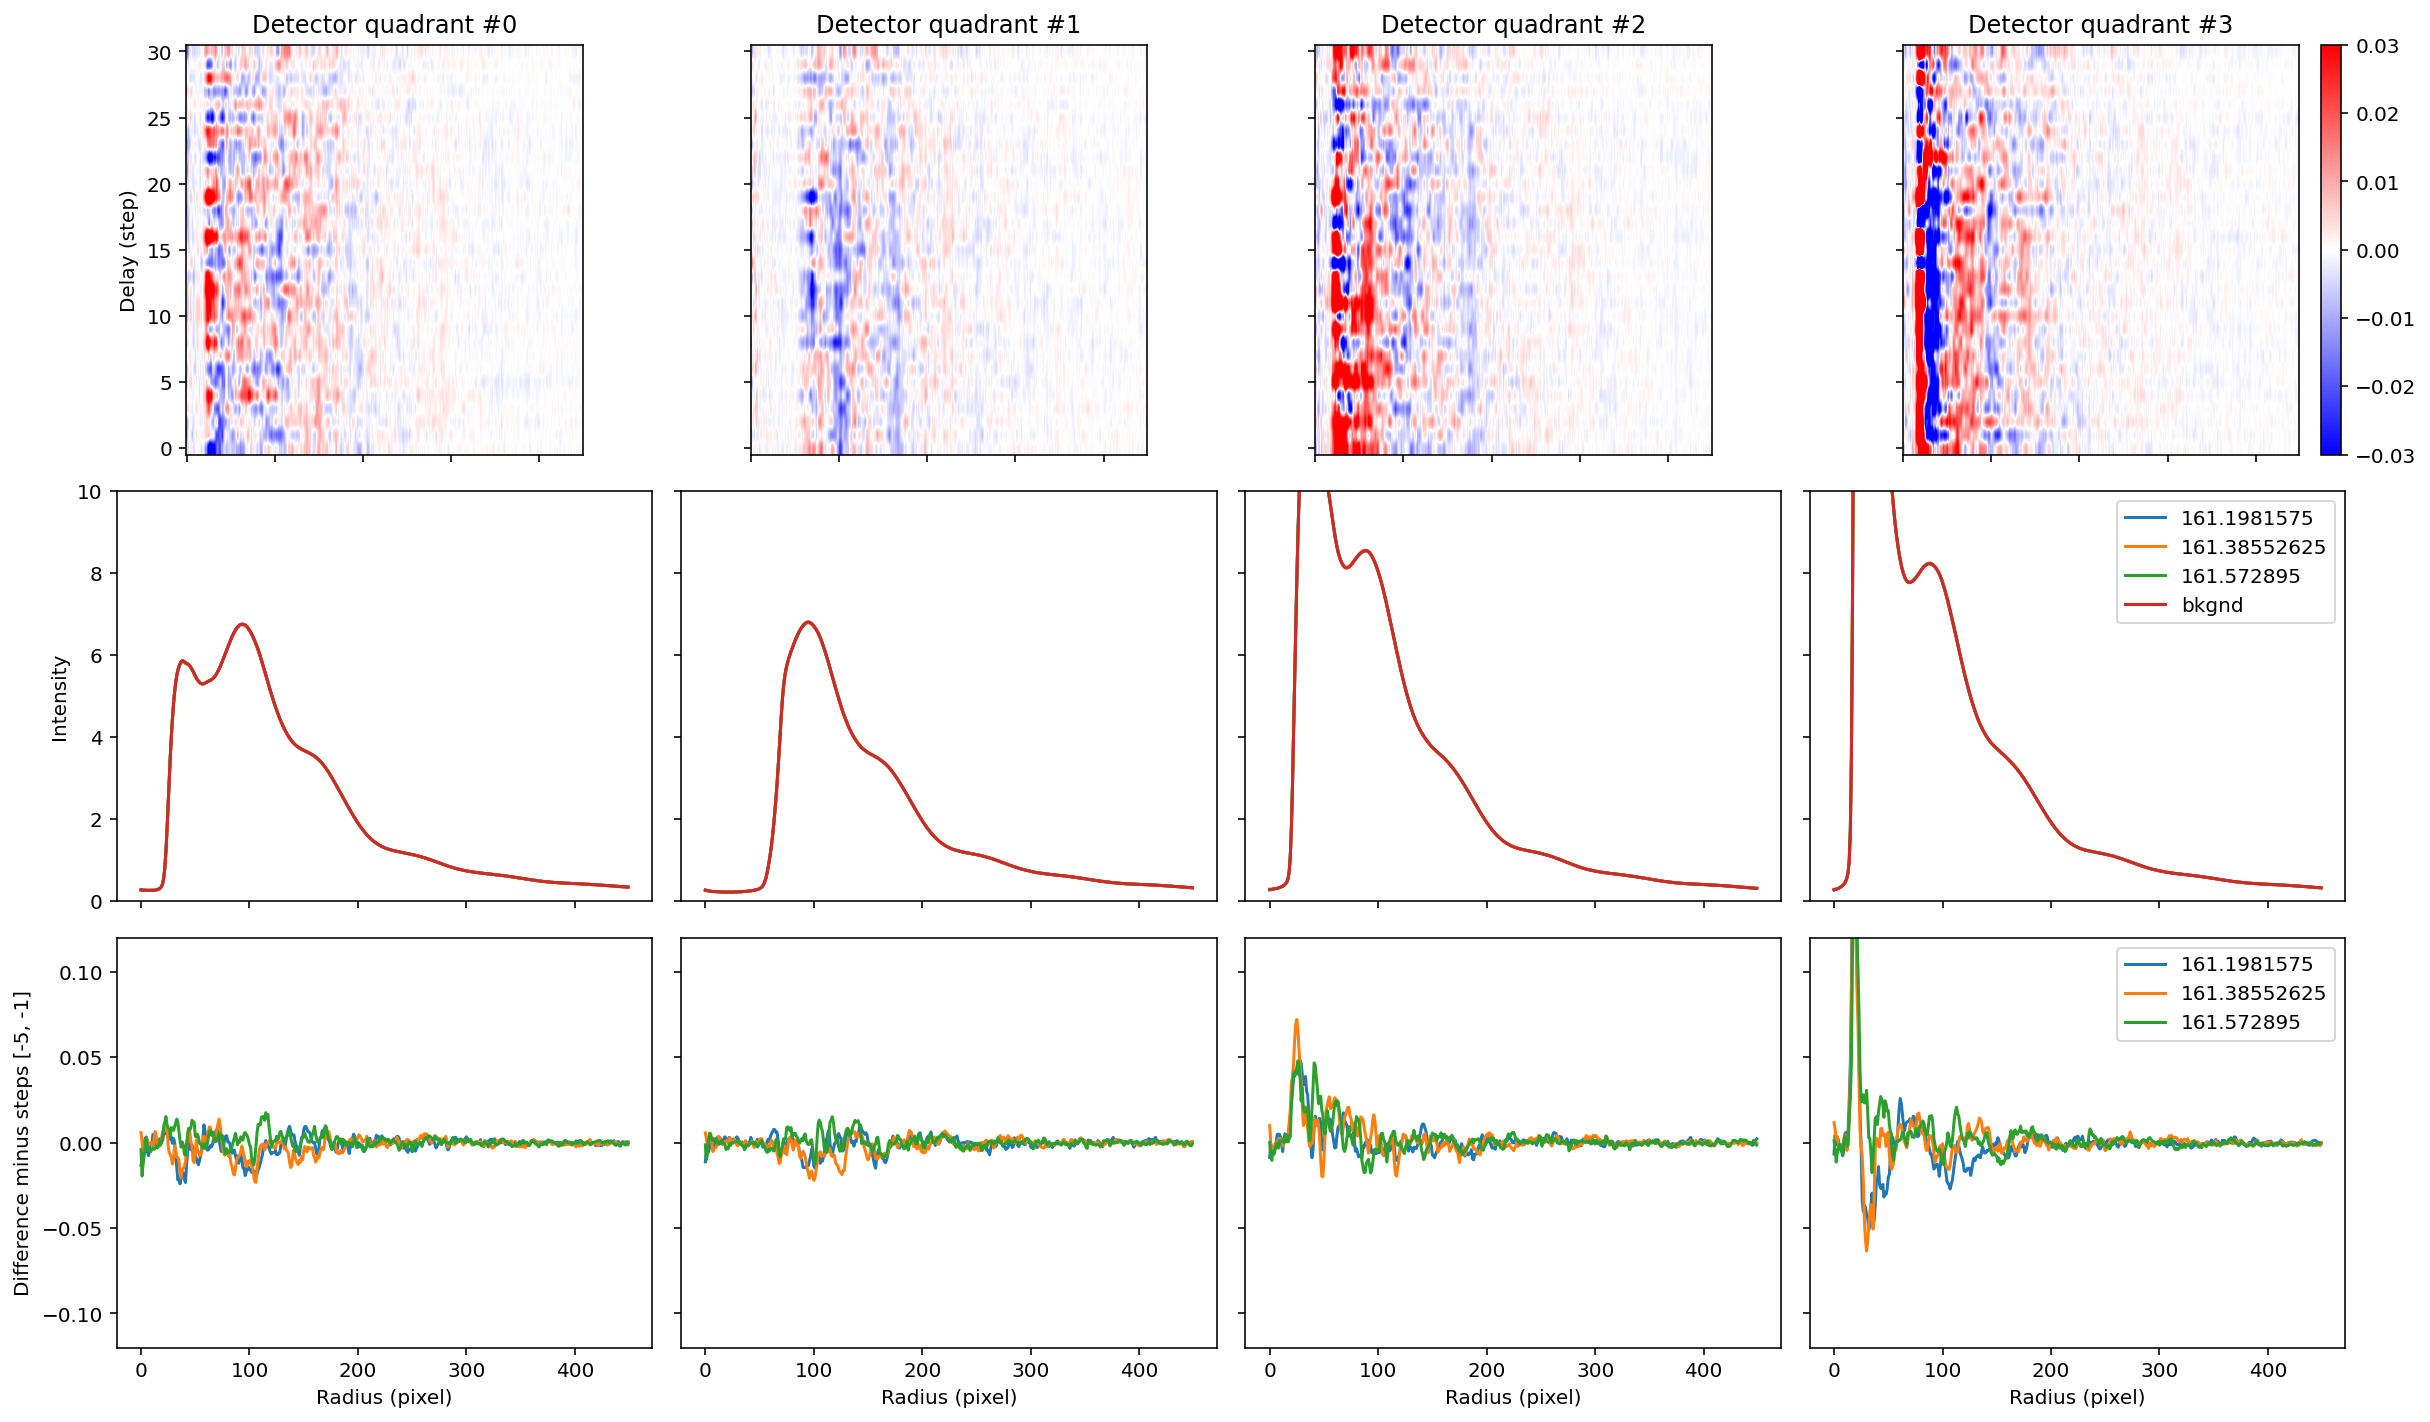

In [111]:
# BUG: why does running this script twice make bottom panel work? 
# BUG: The green background trace should not be zero, why does changing bkgnd_delays range fix it?

# Normalization helpful to visualize data
# Might need to use gridspec to control spacing and aspect ratio https://matplotlib.org/3.1.0/tutorials/intermediate/gridspec.html

delays = [1, len(Exp.delays_unique)//2, -1]
labels = [f'{Exp.delays_unique[step]}' for step in delays]
bkgnd_delays = [-5,-1]
print(f"subtracting delays {bkgnd_delays[0]} through {bkgnd_delays[1]}")

vmin, vmax = -0.03, 0.03
sub = True # see nothing without subtracting!
cmap = cm.bwr  #cmap = cm.PuBu_r

Nc = 4
fig, axs = plt.subplots(3, Nc, figsize=(17, 10))

images = []
cnt = 0

for quad in range(Nc):
        # Generate data with a range that varies from one plot to the next.
        data = []
        data2 = []
        data  = Exp.meanquadsN[:,:,quad].copy() # crucial we copy here or we just get a reference and then below edit it with -= !!!!
        data2 = Exp.meanquadsN[delays,:,quad].copy()
        
        bkgnd = []
        bkgnd = np.mean(Exp.meanquadsN[bkgnd_delays[0]:bkgnd_delays[1], :, quad].copy(),axis=0)
        print(np.min(bkgnd), np.max(bkgnd), np.mean(bkgnd))
        data_sub  = data - bkgnd
        data2_sub = data2 - bkgnd
            
        pltq = images.append(axs[0, quad].imshow(data_sub, cmap=cmap, vmin=vmin, vmax=vmax, origin='lower', aspect=15))
        images.append(axs[1, quad].plot(np.transpose(data2)))
        images.append(axs[1, quad].plot(np.transpose(bkgnd))) # uncomment to plot the background contribution subtracted
        images.append(axs[2, quad].plot(np.transpose(data2_sub)))

        axs[0,quad].set_title('Detector quadrant #' + str(quad))
        axs[0,quad].set_xlabel('Radius (pixel)')
        axs[0,quad].set_ylabel('Delay (step)')
        axs[0,quad].label_outer()
        axs[1,quad].set_xlabel('Radius (pixel)')
        axs[1,quad].set_ylabel('Intensity')
        axs[1,quad].label_outer()
        axs[1,quad].set_ylim(0,10)         
        axs[2,quad].set_xlabel('Radius (pixel)')
        axs[2,quad].set_ylabel(f'Difference minus steps {bkgnd_delays}')
        axs[2,quad].label_outer()
        axs[2,quad].set_ylim(-0.12,0.12)
        
        cnt +=1
        
#plt.colorbar(images[0], ax=axs[0,0],fraction=0.046, pad=0.04)
#plt.colorbar(images[0], ax=axs[0,1],fraction=0.046, pad=0.04)
#plt.colorbar(images[0], ax=axs[0,2],fraction=0.046, pad=0.04)
plt.colorbar(images[0], ax=axs[0,3],fraction=0.046, pad=0.04)
fig.tight_layout()
axs[1,3].legend(labels + ['bkgnd'])
axs[2,3].legend(labels)
plt.show()
fig.savefig(f"{fn}_quadrants.pdf")  

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121]
[1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 

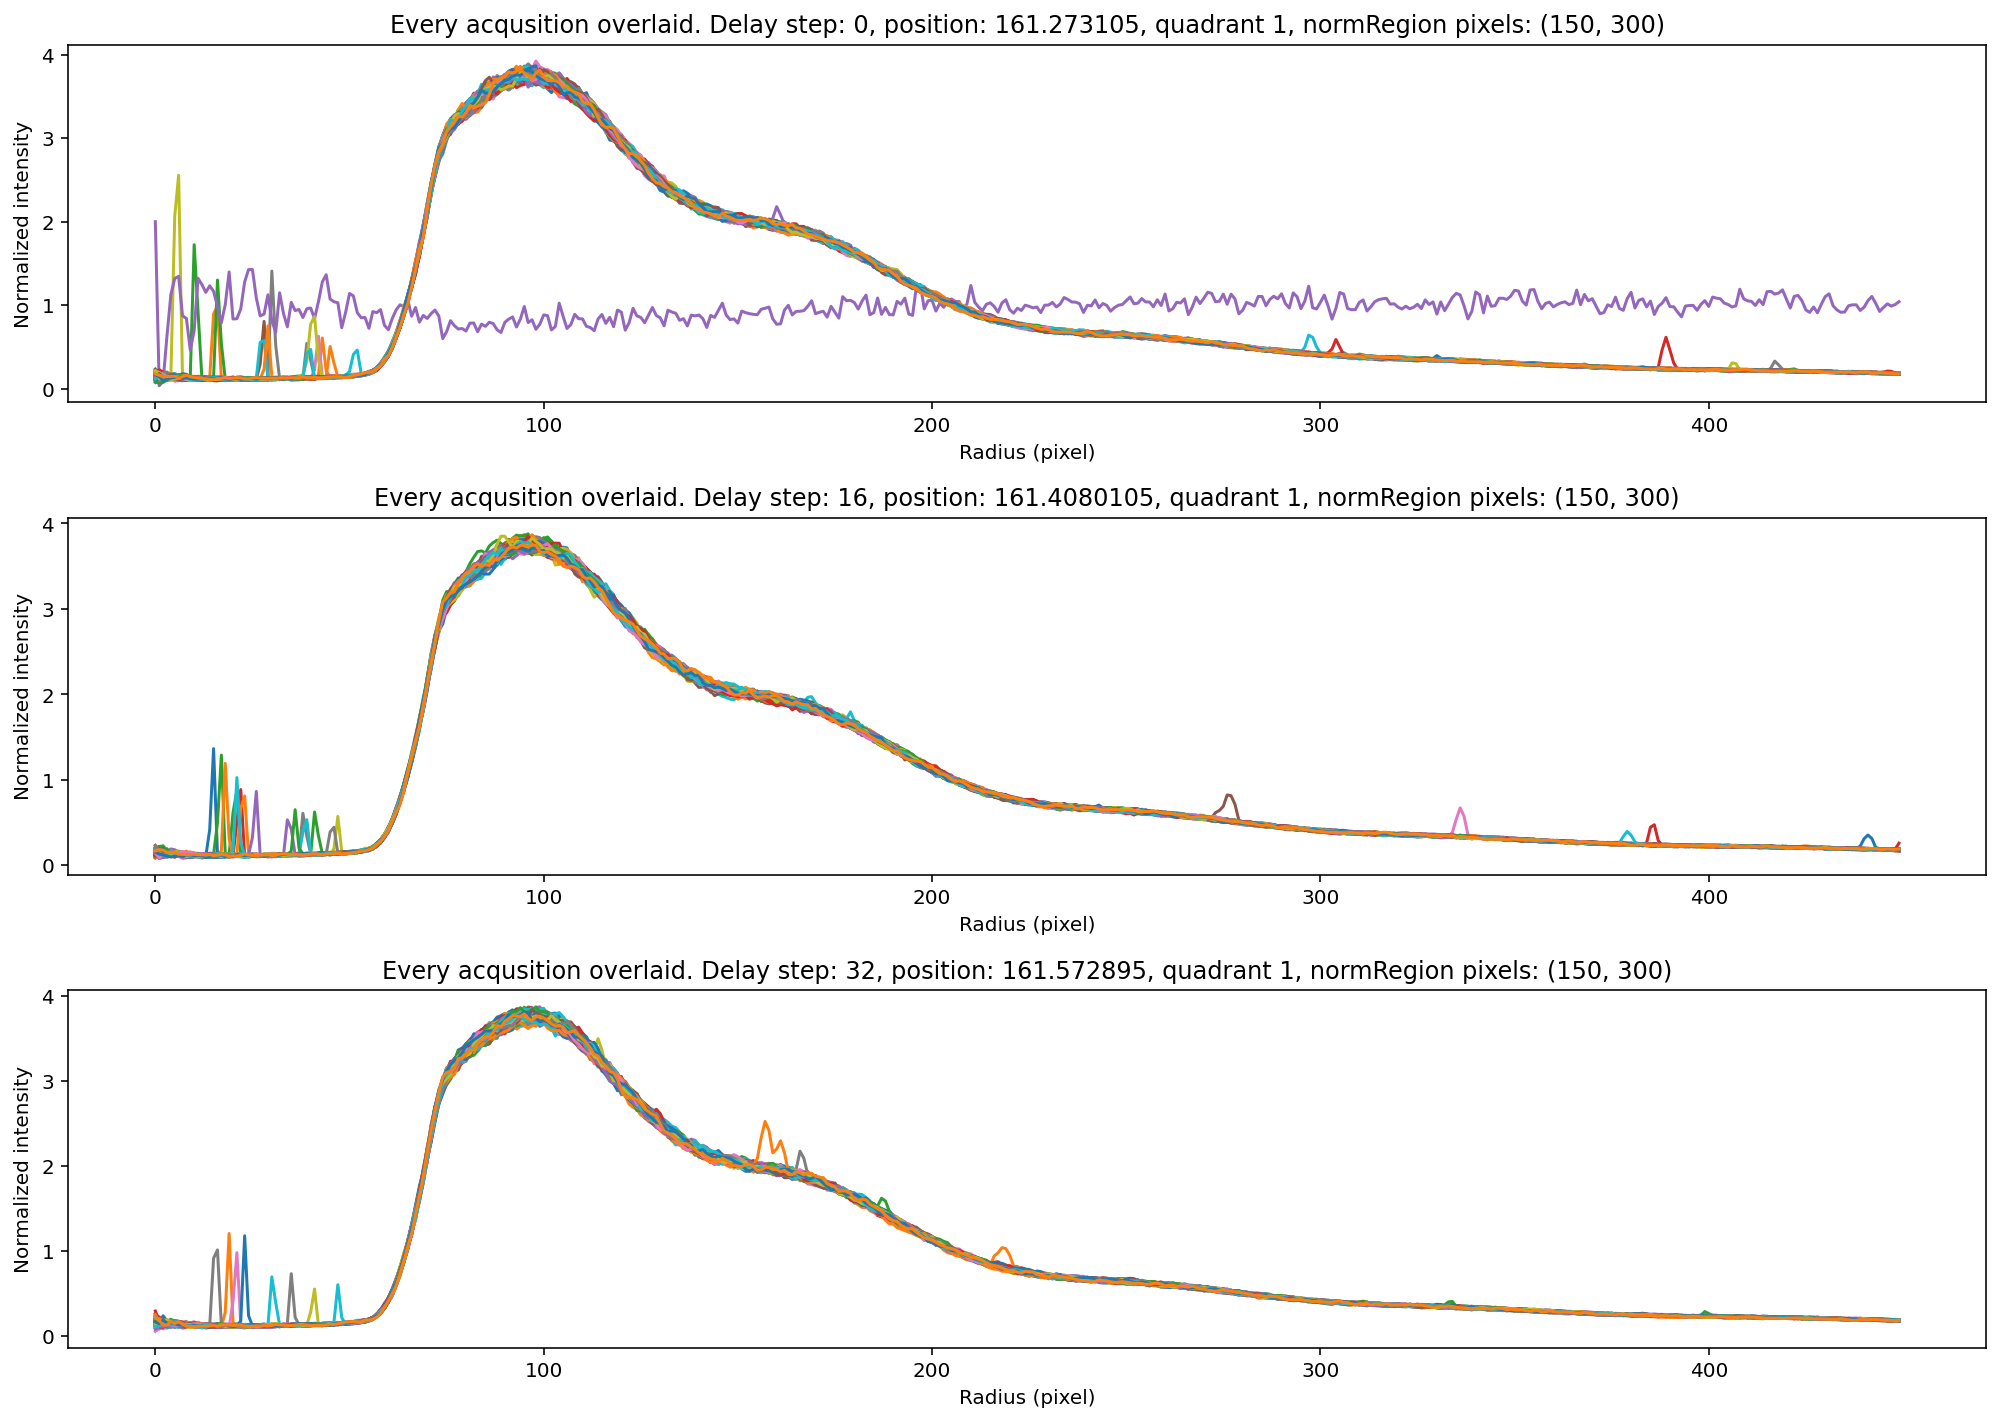

In [71]:
# want run diagnostics, compare normalized quadrants at a single delay stage position

quadrant = 1
delay_step = [0, len(Exp.delays_unique)//2, len(Exp.delays_unique)-1]
fig, axs = plt.subplots(len(delay_step), 1, figsize=(14, 10))
cnt = 0
subtract_mean = False

for idx, delay_unique in enumerate(Exp.delays_unique):
    #print(idx, delay_unique)
    if idx in delay_step:
        delay_indices = Exp.delays_dict[delay_unique]
        print(delay_indices)
        labels = [Exp.delays_i[i] for i in delay_indices]
        d      = Exp.quadsN[delay_indices,:,quadrant].copy()
        if subtract_mean:
            d     -= Exp.meanquadsN[idx, :, quadrant].copy()
            
        axs[cnt].plot(np.transpose(d))
        #axs[cnt].legend(labels)
        axs[cnt].set_title(f'Every acqusition overlaid. Delay step: {delay_step[cnt]}, position: {Exp.delays_unique[delay_step[cnt]]}, quadrant {quadrant}, normRegion pixels: {Exp.normRegion}')
        axs[cnt].set_ylabel(f'Normalized intensity')
        axs[cnt].set_xlabel('Radius (pixel)')
        cnt += 1

plt.tight_layout()
fig.savefig(f"{fn}_diagnostics.pdf")  
